In [1]:
!pip install geopy

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None) #Show all columns of the dataframe

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from geopy.geocoders import Nominatim
#Statistics
from scipy import stats

from time import sleep

import warnings #Disable warning 
warnings.filterwarnings("ignore")

In [3]:
#Configs
statistic_significance = 5/100
fontsize_title = 10

In [4]:
file_path = '../data/processed_data.csv'
df = pd.read_csv(file_path)
data_meaning = pd.read_csv('../data/columns_meaning.csv', delimiter = ";")

In [5]:
df.head()

rev_Mean  mou_Mean  totmrc_Mean  ovrmou_Mean  ovrrev_Mean  change_mou  \
0   23.9975    219.25        22.50          0.0          0.0     -157.25   
1   55.2300    570.50        71.98          0.0          0.0       38.50   
2   38.0525    682.50        52.49          0.0          0.0      147.50   
3   31.6625     25.50        29.99          0.0          0.0       59.50   
4   25.2250      2.50        25.00          0.0          0.0       -2.50   

   change_rev  unan_vce_Mean  plcd_vce_Mean  recv_vce_Mean  comp_vce_Mean  \
0    -18.9975       6.333333      52.333333      42.333333      45.000000   
1      0.0000      77.000000     222.333333      94.666667     137.000000   
2     -3.0625      13.000000      97.000000      13.000000      73.333333   
3      4.0275       2.333333       6.666667       0.000000       3.333333   
4     -0.2250       0.333333       1.333333       0.333333       1.000000   

   custcare_Mean  inonemin_Mean  mou_cvce_Mean  mou_rvce_Mean  \
0       0.000000           18.0      90.643333      97.176667   
1       8.666667           66.0     285.233333     106.330000   
2       0.666667            5.0     470.023333      42.196667   
3       0.000000            0.0       3.800000       0.000000   
4       0.000000            0.0       1.306667       1.133333   

   owylis_vce_Mean  mouowylisv_Mean  iwylis_vce_Mean  mouiwylisv_Mean  \
0         0.000000         0.000000         0.000000         0.000000   
1        14.666667        10.816667         0.666667         0.366667   
2         6.666667         6.230000         0.000000         0.000000   
3         0.000000         0.000000         0.000000         0.000000   
4         0.333333         0.023333         0.000000         0.000000   

   peak_vce_Mean  mou_peav_Mean  opk_vce_Mean  mou_opkv_Mean  drop_blk_Mean  \
0      58.000000     132.600000     24.000000      55.220000       1.333333   
1      97.333333     173.476667     90.333333     218.086667      10.333333   
2      33.333333      81.066667     53.000000     431.153333      10.666667   
3       1.666667       1.866667      1.666667       1.933333       1.000000   
4       0.666667       2.200000      0.666667       0.240000       0.000000   

   attempt_Mean  complete_Mean  churn  months crclscod asl_flag  totcalls  \
0     52.333333      45.000000      1      61        A        N      1652   
1    222.333333     137.000000      0      57        A        N      4485   
2     97.000000      73.333333      0      53        B        N      4491   
3      6.666667       3.333333      0      57        A        N       391   
4      1.333333       1.000000      0      53        A        N       400   

    totmou   totrev   adjrev   adjmou  adjqty  avgrev  avgmou  avgqty  \
0   4228.0  1504.62  1453.44   4085.0    1602   29.66   83.37   32.69   
1  14028.0  2181.12  2166.48  13965.0    4452   38.69  249.38   79.50   
2  12492.0  1427.71  1423.06  12439.0    4470   34.71  303.39  109.02   
3    994.0  1458.42  1457.84    976.0     377   26.51   17.75    6.85   
4    642.0  1370.94  1323.62    613.0     385   25.95   12.02    7.55   

   avg3mou  avg3qty  avg3rev  avg6mou  avg6qty  avg6rev  \
0      272      116       30    322.0    136.0     38.0   
1      558      191       55    586.0    196.0     80.0   
2      633       96       39    719.0    112.0     58.0   
3        6        3       30     54.0      7.0     34.0   
4        3        2       25      4.0      3.0     25.0   

                            area dualband refurb_new  hnd_price marital  \
0  NORTHWEST/ROCKY MOUNTAIN AREA        Y          N  149.98999       S   
1               NEW ENGLAND AREA        Y          N  149.98999       S   
2                    DALLAS AREA        Y          N   79.98999       M   
3                    DALLAS AREA        Y          N   79.98999       M   
4       CENTRAL/SOUTH TEXAS AREA        Y          N   59.98999       U   

  creditcd  eqpdays  custcare_bool  
0        Y    361.0              

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79715 entries, 0 to 79714
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rev_Mean         79715 non-null  float64
 1   mou_Mean         79715 non-null  float64
 2   totmrc_Mean      79715 non-null  float64
 3   ovrmou_Mean      79715 non-null  float64
 4   ovrrev_Mean      79715 non-null  float64
 5   change_mou       79715 non-null  float64
 6   change_rev       79715 non-null  float64
 7   unan_vce_Mean    79715 non-null  float64
 8   plcd_vce_Mean    79715 non-null  float64
 9   recv_vce_Mean    79715 non-null  float64
 10  comp_vce_Mean    79715 non-null  float64
 11  custcare_Mean    79715 non-null  float64
 12  inonemin_Mean    79715 non-null  float64
 13  mou_cvce_Mean    79715 non-null  float64
 14  mou_rvce_Mean    79715 non-null  float64
 15  owylis_vce_Mean  79715 non-null  float64
 16  mouowylisv_Mean  79715 non-null  float64
 17  iwylis_vce_M

In [7]:
df.describe(include = 'all')

rev_Mean      mou_Mean   totmrc_Mean   ovrmou_Mean   ovrrev_Mean  \
count   79715.000000  79715.000000  79715.000000  79715.000000  79715.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       48.518874    368.871074     42.438621     23.697564      8.172051   
std        25.504530    312.350203     18.899670     46.334618     15.928160   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.645000    127.500000     29.990000      0.000000      0.000000   
50%        42.390000    290.500000     41.225000      0.500000      0.195000   
75%        59.990000    529.750000     50.000000     27.000000      9.362500   
max       217.437500   1996.750000    149.992500    396.000000    154.000000   

          change_mou    change_rev  unan_vce_Mean  plcd_vce_Mean  \
count   79715.000000  79715.000000   79715.000000   79715.000000   
unique           NaN           NaN            NaN            NaN   
top              NaN           NaN            NaN            NaN   
freq             NaN           NaN            NaN            NaN   
mean       -9.171820     -1.417726      19.216463     103.614058   
std       170.195962     20.620025      20.467086      91.071093   
min      -993.750000   -100.000000       0.000000       0.000000   
25%       -72.000000     -5.390000       4.000000      31.666667   
50%        -5.500000     -0.270000      12.666667      82.666667   
75%        52.750000      1.047500      27.333333     153.666667   
max       997.750000     99.945000     110.000000     525.000000   

        recv_vce_Mean  comp_vce_Mean  custcare_Mean  inonemin_Mean  \
count    79715.000000   79715.000000   79715.000000   79715.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        34.772874      78.715771       1.210190      18.397625   
std         41.574752      70.154509       3.153806      24.012194   
min          0.000000       0.000000       0.000000       0.000000   
25%          3.666667      23.666667       0.000000       1.666667   
50%         19.666667      62.333333       0.000000       9.333333   
75%         50.666667     116.000000       1.000000      25.333333   
max        296.333333     400.000000     150.000000     150.000000   

        mou_cvce_Mean  mou_rvce_Mean  owylis_vce_Mean  mouowylisv_Mean  \
count    79715.000000   79715.000000     79715.000000     79715.000000   
unique            NaN            NaN              NaN              NaN   
top               NaN            NaN              NaN              NaN   
freq              NaN            NaN              NaN              NaN   
mean       166.163859      69.937440        17.005440        18.121944   
std        169.665123      89.128601        20.297973        24.624662   
min          0.000000       0.000000         0.000000         0.000000   
25%         39.513333       4.923333         2.333333         1.686667   
50%        117.980000      35.496667        10.000000         9.003333   
75%        238.316667     101.696667        24.333333        24.453333   
max       1199.453333     599.256667       196.666667       199.850000   

        iwylis_vce_Mean  mouiwylisv_Mean  peak_vce_Mean  mou_peav_Mean  \
count      79715.000000     79715.000000   79715.000000   79715.000000   
unique              NaN              NaN            NaN            NaN   
top                 NaN              NaN            NaN            NaN   
freq                NaN              NaN            NaN            NaN   
mean           4.548374         9.661117      63.295632     124.205253   
std            7.381308        16.588734      58.264851     

**We can group these features based on some classifications.**

- Rev = revenue
- mou = minutes of use
- totmrc = recurring charge
- tot = total over lifetime
- adj = Billing adjusted 
- qty = number of calls

  -------------------
- vce = voice
- dat = data calls
- wy = wireless voice call

  --------------------
- ovr = overage use
- unan = unanswered
- plcd = placed
- recv/rv = received
- comp = completed
- blk = blocked
- peak = peak hour
- okp = out of peak

  --------------------

- in = inbound
- o = outbound

  --------------------

- avg = month average based on lifetime
- avg3 = month average of the last 3 months
- avg6 = month average of the last 6 months

In [8]:
rev_features = ['rev_Mean', 'totmrc_Mean', 'ovrrev_Mean','change_rev','totrev','adjrev','avgrev','avg3rev','avg6rev']
voice_features = ['unan_vce_Mean','plcd_vce_Mean','recv_vce_Mean','comp_vce_Mean','peak_vce_Mean','opk_vce_Mean']
minutes_features = ['mou_Mean', 'ovrmou_Mean', 'change_mou','mou_peav_Mean', 'mou_opkv_Mean ', 'totmou','adjmou', 'adjmou', 'avgmou','avg3mou','avg6mou']
calls = ['drop_blk_Mean', 'attempt_Mean', 'complete_Mean','totcalls','adjqty', 'avgqty','avg3qty','avg6qty']


wireless = ['owylis_vce_Mean',
'mouowylisv_Mean',
'iwylis_vce_Mean',
'mouiwylisv_Mean']


## 1.2 Features correlation

In [9]:
# Categorical features
categorical_features = ['crclscod','asl_flag','area','dualband','refurb_new','marital','creditcd'] 
#Also churn and custcare_bool, but we can deal with then as numerical values for now

numerical_features = df.drop(categorical_features, axis=1).columns

new_features = []

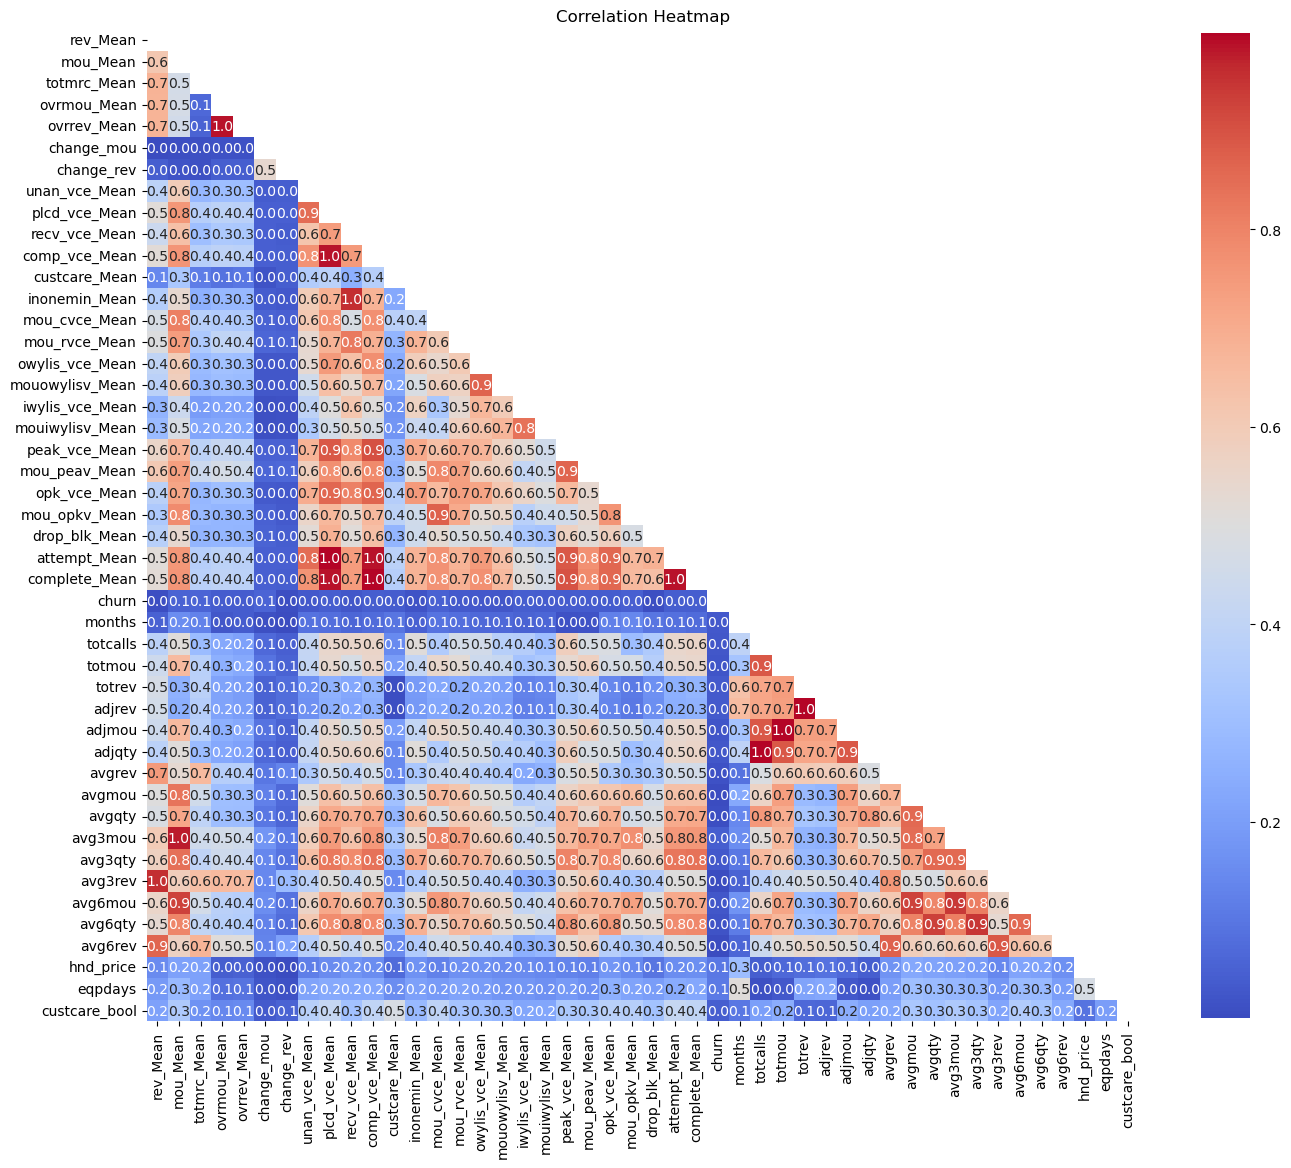

In [10]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr().abs()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 16))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, mask =mask)

plt.title('Correlation Heatmap')
plt.show()

As we can see, there are many pairs of features with high correlation. Also, churn has a small correlation with the great majority of these features.

Now let's start analyzing some groups of variables. The first one will be the overage features. We can see that they correlate very strongly with each other, and also with avg3rev, avg6rev, and avgmou (in decreasing order of values).

In [11]:
df[numerical_features].corr().abs()['churn'].sort_values(ascending = False)

churn              1.000000
eqpdays            0.109768
hnd_price          0.105032
totmrc_Mean        0.057805
change_mou         0.056370
mou_Mean           0.051656
mou_cvce_Mean      0.050891
mou_opkv_Mean      0.047061
complete_Mean      0.043326
comp_vce_Mean      0.043039
attempt_Mean       0.040814
plcd_vce_Mean      0.040541
custcare_bool      0.040302
iwylis_vce_Mean    0.039983
avg3mou            0.039974
opk_vce_Mean       0.038865
ovrmou_Mean        0.038295
custcare_Mean      0.038089
mou_peav_Mean      0.038041
peak_vce_Mean      0.037190
mouiwylisv_Mean    0.036273
ovrrev_Mean        0.036126
totrev             0.034001
adjrev             0.033833
mou_rvce_Mean      0.032097
unan_vce_Mean      0.031010
owylis_vce_Mean    0.030845
months             0.028940
avg3qty            0.028898
mouowylisv_Mean    0.028167
avg6mou            0.027761
totcalls           0.026631
adjqty             0.025796
recv_vce_Mean      0.024422
totmou             0.023297
adjmou             0

## 1.2.1 Overage features

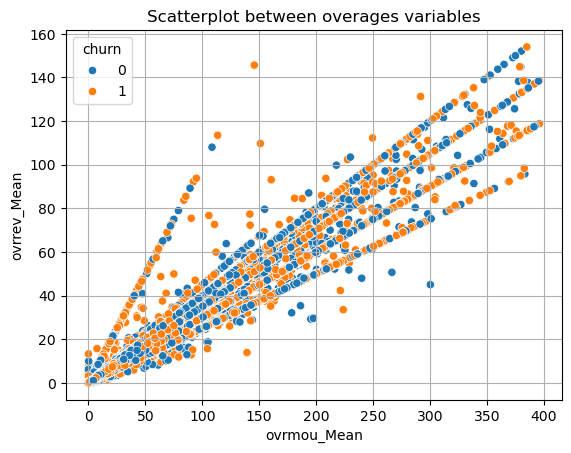

In [12]:
#Overage impact on churn
features = ['ovrmou_Mean', 'ovrrev_Mean']

sns.scatterplot(data = df, x = features[0], y = features[1], hue = 'churn')
plt.title('Scatterplot between overages variables')
plt.grid()
plt.show()

We can see a lot of linear lines on this plot. Probably there are different types of pricing for overage of minutes, with one of them being the most expensive (line from the left).

There is no clear local where the churn is concentrated on this graph. So let's try to break into groups to see if any pattern appears.

- Groups with 0 overage of minutes; groups with small overage (<100) and groups with large overages (>100).
- Group of people that have the most expensive pricing Vs the less expensive. 

In [13]:
#First question:
limit = 100

mask_group1 = df['ovrmou_Mean'] == 0
mask_group2 = (df['ovrmou_Mean'] > 0) & (df['ovrmou_Mean'] <= limit)
mask_group3 = (df['ovrmou_Mean'] > limit)

df_group1 = df[mask_group1]
df_group2 = df[mask_group2]
df_group3 = df[mask_group3]

print(f"Churn proportion for: \nGroup 1: {df_group1['churn'].mean()}\nGroup 2: {df_group2['churn'].mean()}\nGroup 3: {df_group3['churn'].mean()}")

Churn proportion for: 
Group 1: 0.48966449356018443
Group 2: 0.49822151690927
Group 3: 0.5532854776366648


In [14]:
limit = 300

mask_group1 = df['ovrmou_Mean'] == 0
mask_group2 = (df['ovrmou_Mean'] > 0) & (df['ovrmou_Mean'] <= limit)
mask_group3 = (df['ovrmou_Mean'] > limit)

df_group1 = df[mask_group1]
df_group2 = df[mask_group2]
df_group3 = df[mask_group3]

print(f"Churn proportion for: \nGroup 1: {df_group1['churn'].mean()}\nGroup 2: {df_group2['churn'].mean()}\nGroup 3: {df_group3['churn'].mean()}")

Churn proportion for: 
Group 1: 0.48966449356018443
Group 2: 0.5050132810069635
Group 3: 0.578125


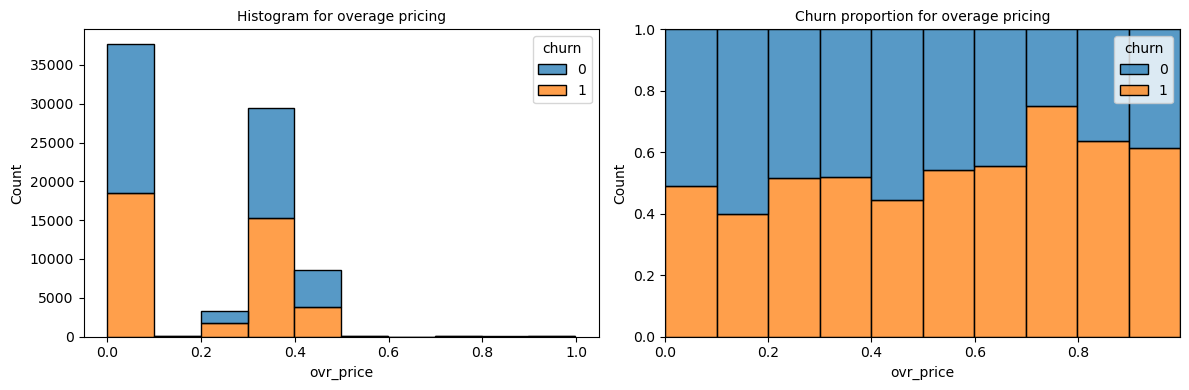

In [15]:
#Second question:
#Group 1 -> ovrrev_Mean = ovrmou_Mean  (looking at the graph) -> most expensive
#Group 2 -> ovrrev_Mean = ovrmou_Mean/4 -> less expensive

df['ovr_price'] = df['ovrrev_Mean']/df['ovrmou_Mean']
df['ovr_price'] = df['ovr_price'].fillna(0)



new_features.append('ovr_price')

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data = df[df['ovr_price']<1], x = 'ovr_price', hue = 'churn', bins = 10, multiple="stack", ax = ax[0])
ax[0].set_title('Histogram for overage pricing',fontsize = fontsize_title)

# Right plot - Box plot
sns.histplot(data = df[df['ovr_price']<1], x = 'ovr_price', hue = 'churn', bins = 10, multiple="fill", ax = ax[1])
ax[1].set_title('Churn proportion for overage pricing', fontsize = fontsize_title)
plt.tight_layout()

plt.show()

In [16]:
mask1 = df["ovr_price"]<=0.2

print(f'Number of cases for pricing <0.2: {mask1.sum()} --- Churn proportion: {df[mask1]["churn"].mean()} ')

mask1 = (df["ovr_price"]>0.2) & (df["ovr_price"]<0.4)

print(f'0.2 < price <0.4: {mask1.sum()} --- Churn proportion: {df[mask1]["churn"].mean()} ')

mask1 = (df["ovr_price"]>0.4)

print(f'price > 0.4: {mask1.sum()} --- Churn proportion: {df[mask1]["churn"].mean()} ')

Number of cases for pricing <0.2: 37795 --- Churn proportion: 0.4894827358116153 
0.2 < price <0.4: 36760 --- Churn proportion: 0.5100108813928182 
price > 0.4: 1023 --- Churn proportion: 0.6050830889540567 


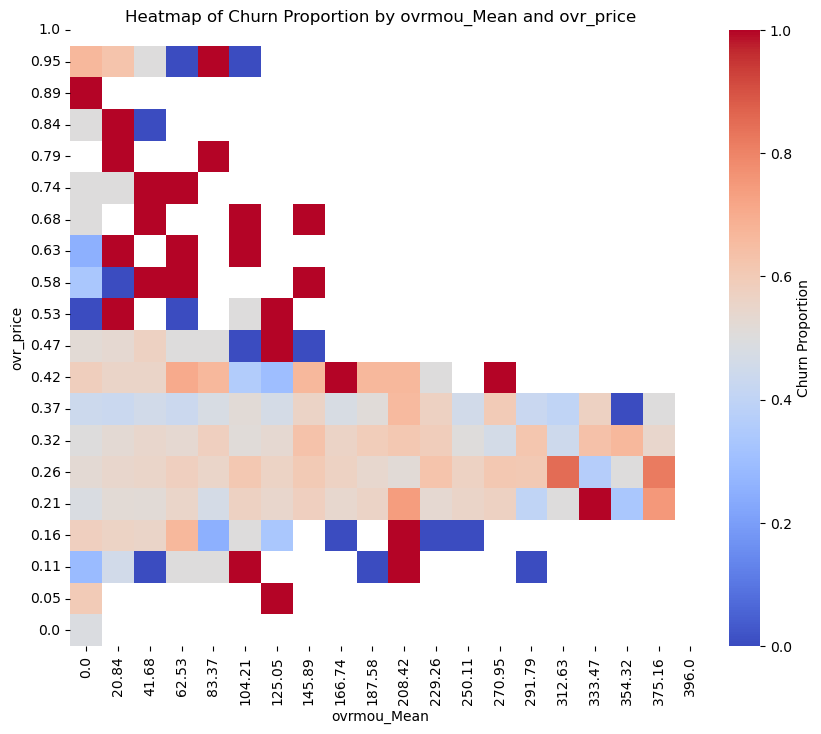

In [17]:
#Lets plot a heatmap of churn proportion

df_aux = df[df['ovr_price'].notna() & (df['ovr_price'] < 1) & (df['ovr_price'] != np.inf) & (df['ovr_price'] != -np.inf)]

# Definindo os bins para os eixos x e y com base nas colunas do DataFrame
x_column = 'ovrmou_Mean'
y_column = 'ovr_price'

x_bins = np.linspace(df_aux[x_column].min(), df_aux[x_column].max(), 20)  # Bins para 'ovrmou_Mean'
y_bins = np.linspace(df_aux[y_column].min(), df_aux[y_column].max(), 20)  # Bins para 'ovr_price'

# Função para calcular a proporção de churn == 1 em cada bin
def calc_churn_proportion(x_bin, y_bin):
    bin_data = df_aux[(df_aux[x_column] >= x_bin[0]) & (df_aux[x_column] < x_bin[1]) &
                   (df_aux[y_column] >= y_bin[0]) & (df_aux[y_column] < y_bin[1])]
    if len(bin_data) == 0:
        return np.nan  # Evitar divisão por zero
    return bin_data['churn'].mean()  # Proporção de churn == 1

# Criando uma matriz para armazenar a proporção de churn para cada célula (bin)
heatmap_data = np.zeros((len(x_bins)-1, len(y_bins)-1))

# Preenchendo a matriz com as proporções
for i in range(len(x_bins)-1):
    for j in range(len(y_bins)-1):
        heatmap_data[i, j] = calc_churn_proportion((x_bins[i], x_bins[i+1]), 
                                                    (y_bins[j], y_bins[j+1]))

# Plotando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.T, 
            cmap='coolwarm',  # Escolha de cores para mostrar altas/baixas proporções
            xticklabels=np.round(x_bins, 2), 
            yticklabels=np.round(y_bins, 2),
            cbar_kws={'label': 'Churn Proportion'})

plt.gca().invert_yaxis()

# Ajustar a orientação dos rótulos do eixo y para horizontal
plt.tick_params(axis='y', rotation=0)

plt.title('Heatmap of Churn Proportion by ovrmou_Mean and ovr_price')
plt.xlabel('ovrmou_Mean')
plt.ylabel('ovr_price')
plt.show()


### Key insights for overage

- **High overage values are associated with higher churn rates.** The greater the overage limit, the more concentrated the churn, indicating that these customers are on inappropriate plans.

- **Most cases are clustered around 20~40 cents per minute.** There appears to be a correlation between the price charged per minute and the probability of churn.

- **Overage usage suggests unmet needs for some customers.** The more minutes they use, the higher their dissatisfaction. There also seems to be a relationship between the amount paid and churn.

- **Hypothesis:** Identify customers with insufficient plans and either offer an upgrade or propose a lower price for additional usage (for customers willing to pay as they go) to better meet their needs.

### Let's create visualization functions

In [18]:
def plot_heatmap_churn_density(df=df, nbins = 20, x_column = 'ovrmou_Mean' , y_column = 'ovr_price'):
    
    x_bins = np.linspace(df[x_column].min(), df[x_column].max(), nbins)  # Bins para 'ovrmou_Mean'
    y_bins = np.linspace(df[y_column].min(), df[y_column].max(), nbins)  # Bins para 'ovr_price'
    
    # Função para calcular a proporção de churn == 1 em cada bin
    def calc_churn_proportion(x_bin, y_bin):
        bin_data = df[(df[x_column] >= x_bin[0]) & (df[x_column] < x_bin[1]) &
                       (df[y_column] >= y_bin[0]) & (df[y_column] < y_bin[1])]
        if len(bin_data) == 0:
            return np.nan  # Evitar divisão por zero
        return bin_data['churn'].mean()  # Proporção de churn == 1
    
    # Criando uma matriz para armazenar a proporção de churn para cada célula (bin)
    heatmap_data = np.zeros((len(x_bins)-1, len(y_bins)-1))
    
    # Preenchendo a matriz com as proporções
    for i in range(len(x_bins)-1):
        for j in range(len(y_bins)-1):
            heatmap_data[i, j] = calc_churn_proportion((x_bins[i], x_bins[i+1]), 
                                                        (y_bins[j], y_bins[j+1]))
    
    # Plotando o heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data.T, 
                cmap='coolwarm',  # Escolha de cores para mostrar altas/baixas proporções
                xticklabels=np.round(x_bins, 2), 
                yticklabels=np.round(y_bins, 2),
                cbar_kws={'label': 'Churn Proportion'})
    
    plt.gca().invert_yaxis()
    
    # Ajustar a orientação dos rótulos do eixo y para horizontal
    plt.tick_params(axis='y', rotation=0)
    
    plt.title(f'Heatmap of Churn Proportion by {x_column} and {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()


In [19]:
def linear_mean_churn_plot(df = df, feature = 'rev_Mean', nbins = 20):

    bins = np.linspace(df[feature].min(), df[feature].max(), num=nbins)  # Ajuste num para o número de bins desejado
        
    # Criar uma nova coluna com os bins
    df['binned'] = pd.cut(df[feature], bins=bins)
    
    # Calcular a média de churn para cada bin
    churn_means = df.groupby('binned')['churn'].mean().reset_index()
    churn_means['mean_bin'] = churn_means['binned'].apply(lambda x: x.mid)

    # Plotar os resultados como um lineplot
    plt.figure(figsize=(5, 3))
    sns.lineplot(x='mean_bin', y='churn', data=churn_means, marker='o', palette='viridis')
    plt.title(f'Average Churn by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [20]:
def create_histplots(df = df, feature = 'rev_Mean', nbins = 20):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(data = df, x = feature, hue = 'churn', bins = nbins, multiple="stack", ax = ax[0])
    ax[0].set_title(f'Histogram for the difference in {feature}',fontsize = fontsize_title)
    
    sns.histplot(data = df, x = feature, hue = 'churn', bins = nbins, multiple="fill", ax = ax[1])
    ax[1].set_title('Churn proportion', fontsize = fontsize_title)
    plt.tight_layout()
    
    plt.show()

## 1.2.2 Revenue and minutes of use

There is medium to high correlation between these two features for all the averages (near 0.6). Let's see their relation closely and how they are related with churn

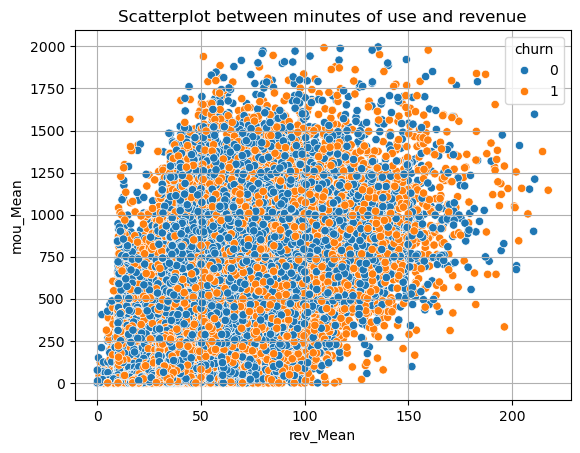

In [21]:
#Overage impact on churn
features = ['rev_Mean', 'mou_Mean']

sns.scatterplot(data = df, x = features[0], y = features[1], hue = 'churn')
plt.title('Scatterplot between minutes of use and revenue')
plt.grid()
plt.show()

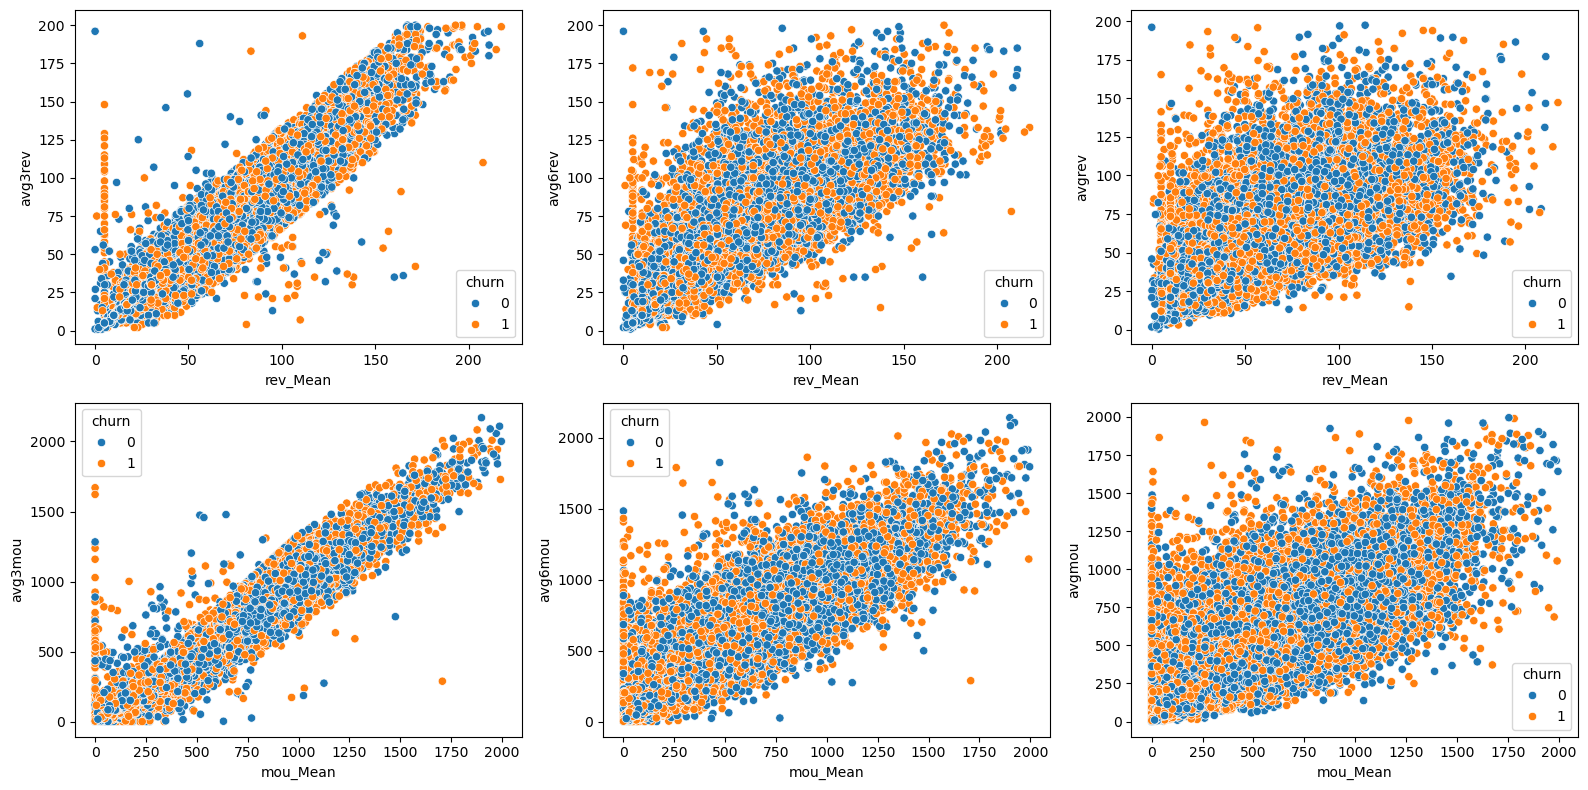

In [22]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
sns.scatterplot(data = df, x = 'rev_Mean', y = 'avgrev', hue = 'churn', ax = ax[0,2])
sns.scatterplot(data = df, x = 'rev_Mean', y = 'avg3rev', hue = 'churn', ax = ax[0,0])
sns.scatterplot(data = df, x = 'rev_Mean', y = 'avg6rev', hue = 'churn', ax = ax[0,1])

sns.scatterplot(data = df, x = 'mou_Mean', y = 'avgmou', hue = 'churn', ax = ax[1,2])
sns.scatterplot(data = df, x = 'mou_Mean', y = 'avg3mou', hue = 'churn', ax = ax[1,0])
sns.scatterplot(data = df, x = 'mou_Mean', y = 'avg6mou', hue = 'churn', ax = ax[1,1])

plt.tight_layout()

plt.show()

**Correlation Analysis of Usage and Revenue**

From the correlations with the averages, it is evident that there is a greater linearity between the monthly average and the average of the last three months. In contrast, the variance for six months and the entire customer lifetime is significantly higher.

Additionally, it is observed that the lines where `rev_Mean` equals 0 and `mou_Mean` equals 0 show a considerable concentration of churn. The behavior of revenue and minutes of usage, when compared to other averages, is similar.

Next, we will analyze whether the variation in minute usage over the last three months correlates with churn rates.

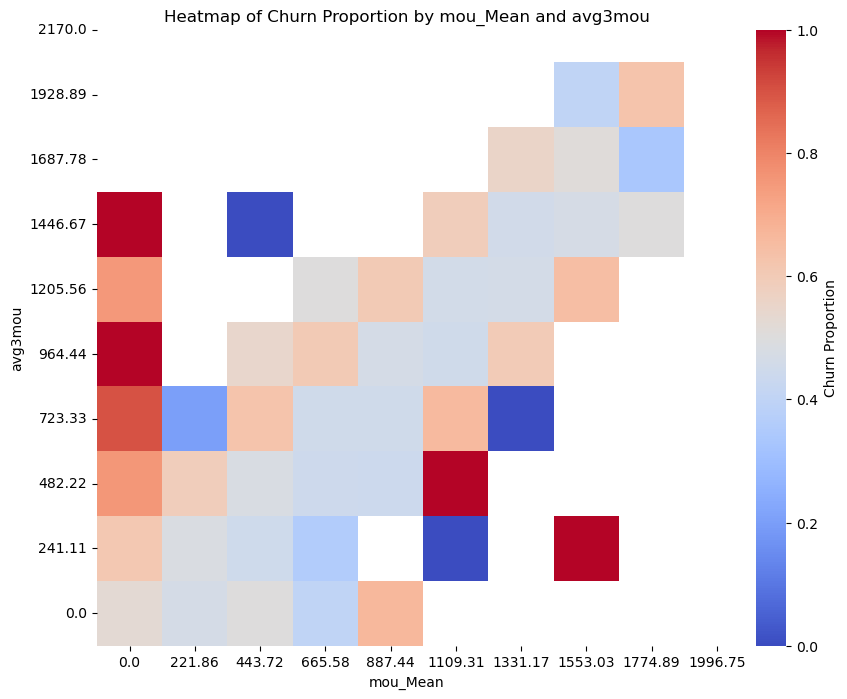

In [23]:
plot_heatmap_churn_density(df=df, nbins = 10, x_column = 'mou_Mean' , y_column = 'avg3mou')

There appear to be two types of churn trends: both increases and decreases in usage seem to impact churn rates. This likely indicates a shift in customer needs, whether it be an increase in service usage or a desire to pay less due to decreased usage. Therefore, it's crucial to monitor these changes over time.

Another noteworthy factor is the instances where `mou_Mean` equals 0, which showed exceptionally high churn rates. This suggests a potential disinterest from the customer.

Next, let's analyze how churn proportions are distributed concerning minutes of usage and revenue for the last month.

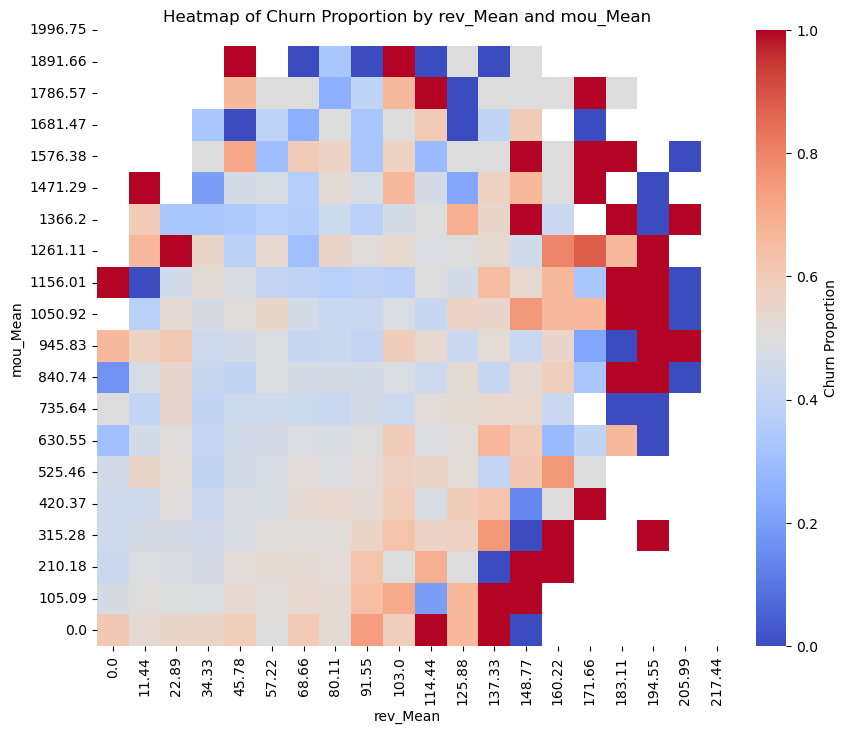

In [24]:
plot_heatmap_churn_density(df=df, nbins = 20, x_column = 'rev_Mean' , y_column = 'mou_Mean')

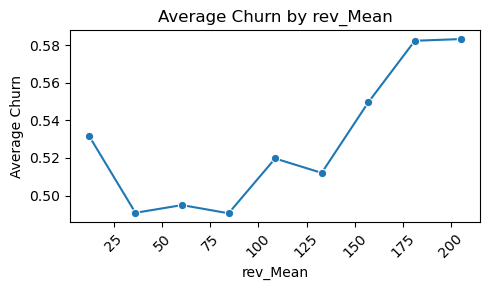

In [25]:
linear_mean_churn_plot(df = df, feature = 'rev_Mean', nbins = 10)

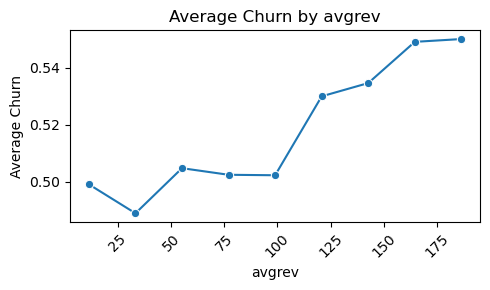

In [26]:
linear_mean_churn_plot(df = df, feature = 'avgrev', nbins = 10)

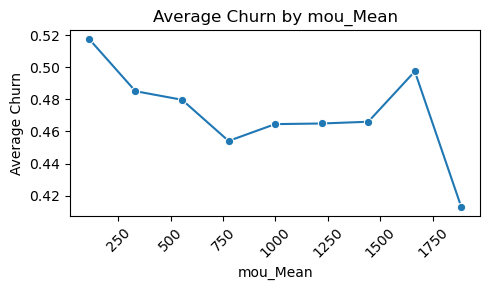

In [27]:
linear_mean_churn_plot(df = df, feature = 'mou_Mean', nbins = 10)

In [28]:
new_features.append('mou_price')
df['mou_price'] = df['rev_Mean']/(df['mou_Mean']+1)  #Minimum value of mou_Mean = 0.. 0.25.. 

In [29]:
(df[df['mou_Mean'] == 0]['rev_Mean'] == 0).sum()
df = df[(df['mou_Mean'] != 0) & (df['rev_Mean'] != 0)]

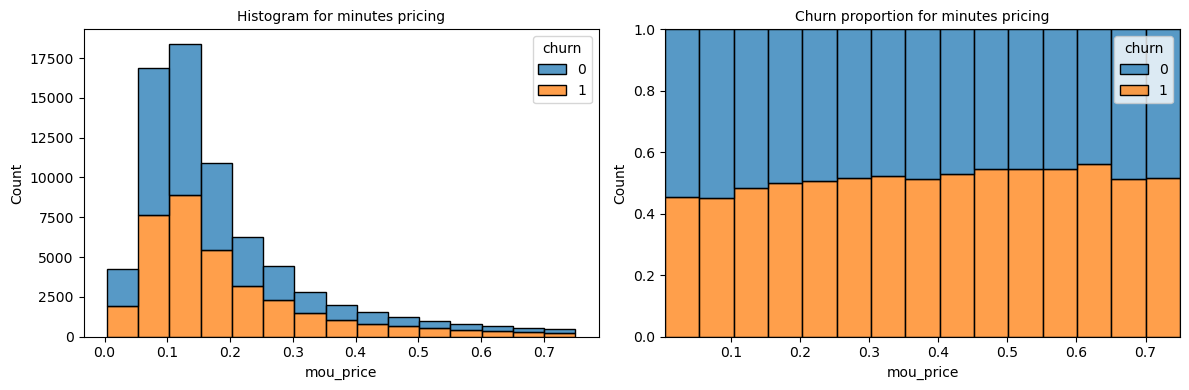

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data = df[df['mou_price']<0.75], x = 'mou_price', hue = 'churn', bins = 15, multiple="stack", ax = ax[0])
ax[0].set_title('Histogram for minutes pricing',fontsize = fontsize_title)

# Right plot - Box plot
sns.histplot(data = df[df['mou_price']<0.75], x = 'mou_price', hue = 'churn', bins = 15, multiple="fill", ax = ax[1])
ax[1].set_title('Churn proportion for minutes pricing', fontsize = fontsize_title)
plt.tight_layout()

plt.show()

**Revenue and Churn Relationship Analysis**

Higher revenue values are associated with increased churn rates (for the same usage). Additionally, for the same revenue value, lower quantities of usage minutes also correlate with higher churn rates.

Most values are clustered around 0.05 cents and 0.15 cents. There also appears to be an increase in churn at higher price points.

### Key insights for revenue and minutes of use
- Two types of churn trends observed: increases and decreases in usage impact churn rates.
- Indicates **shifts in customer needs**, either in increased service usage or a desire to pay less.
- Instances of `mou_Mean` = 0 show exceptionally high churn rates, suggesting customer disinterest.

- Greater linearity between monthly average and the average of the last three months.
- Higher variance for six months and entire customer lifetime compared to the previous averages.

- Higher revenue values are related to increased churn rates for the same usage.
- Lower quantities of usage minutes correlate with higher churn rates at the same revenue level.
- Most values are concentrated around 0.05 cents and 0.15 cents.
- An increase in churn is noted at higher price points.
- **Higher values of revenue** and **lower values of minutes of use** seems to increase the churn

## 1.2.3 Billing adjustment
Now we will focus on how billing adjustment impacts churn

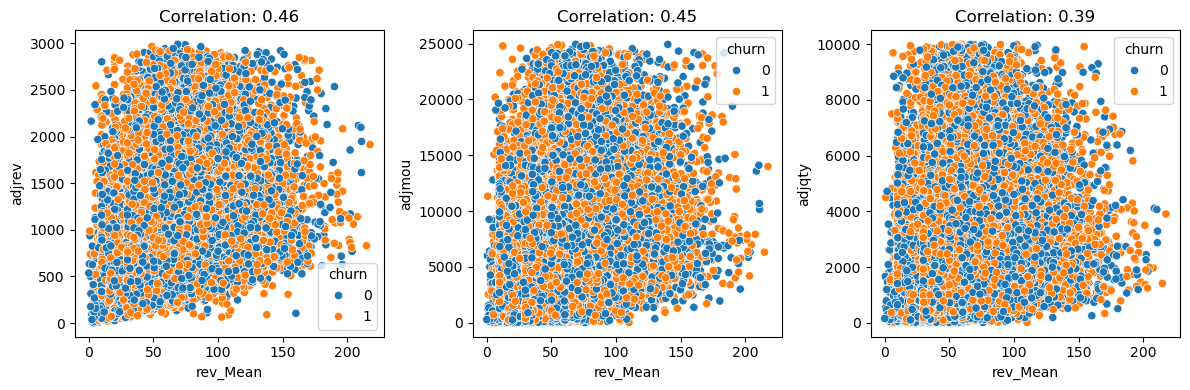

In [31]:
features = ['adjrev', 'adjmou', 'adjqty']

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.scatterplot(data = df, x = 'rev_Mean', y = 'adjrev', hue = 'churn', ax = ax[0])
sns.scatterplot(data = df, x = 'rev_Mean', y = 'adjmou', hue = 'churn', ax = ax[1])
sns.scatterplot(data = df, x = 'rev_Mean', y = 'adjqty', hue = 'churn', ax = ax[2])

ax[0].set_title(f"Correlation: {df['rev_Mean'].corr(df['adjrev']):.2f}")
ax[1].set_title(f"Correlation: {df['rev_Mean'].corr(df['adjmou']):.2f}")
ax[2].set_title(f"Correlation: {df['rev_Mean'].corr(df['adjqty']):.2f}")
plt.tight_layout()

plt.show()

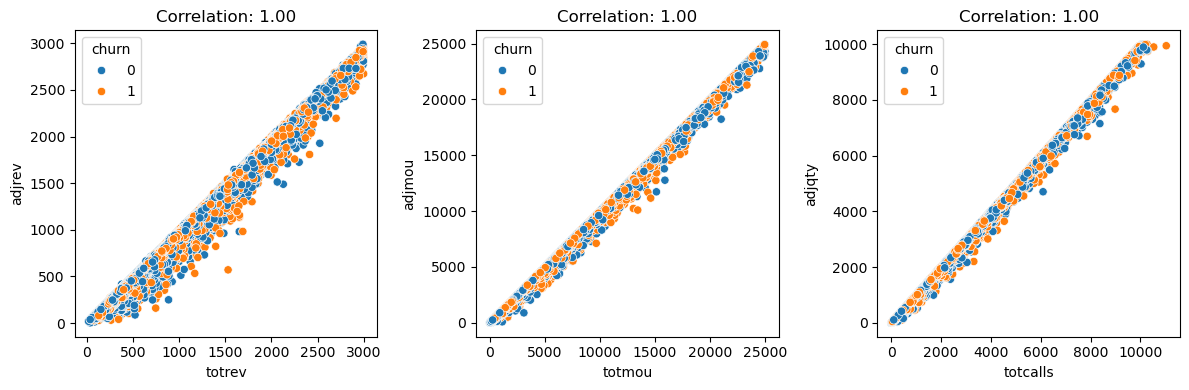

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.scatterplot(data = df, x = 'totrev', y = 'adjrev', hue = 'churn', ax = ax[0])
sns.scatterplot(data = df, x = 'totmou', y = 'adjmou', hue = 'churn', ax = ax[1])
sns.scatterplot(data = df, x = 'totcalls', y = 'adjqty', hue = 'churn', ax = ax[2])

ax[0].set_title(f"Correlation: {df['totrev'].corr(df['adjrev']):.2f}")
ax[1].set_title(f"Correlation: {df['totmou'].corr(df['adjmou']):.2f}")
ax[2].set_title(f"Correlation: {df['totcalls'].corr(df['adjqty']):.2f}")
plt.tight_layout()

plt.show()

These adjustment values refer to the entire customer lifetime and therefore have a strong correlation with the lifetime metrics. It makes more sense, then, to create an average monthly revenue adjustment variable and analyze its behavior.

In [33]:
new_features.append(['avg_adj'])
df['avg_adj'] = df['adjrev']/df['months']

In [34]:
df[list(numerical_features) + ['avg_adj']].corr().abs()['avg_adj'].sort_values(ascending = False).iloc[:10]

avg_adj        1.000000
avgrev         0.971264
avg6rev        0.855093
avg3rev        0.743002
rev_Mean       0.735044
avgmou         0.653119
totmrc_Mean    0.650496
totrev         0.646488
adjrev         0.632271
adjmou         0.609648
Name: avg_adj, dtype: float64

<Axes: xlabel='avg_adj', ylabel='avgrev'>

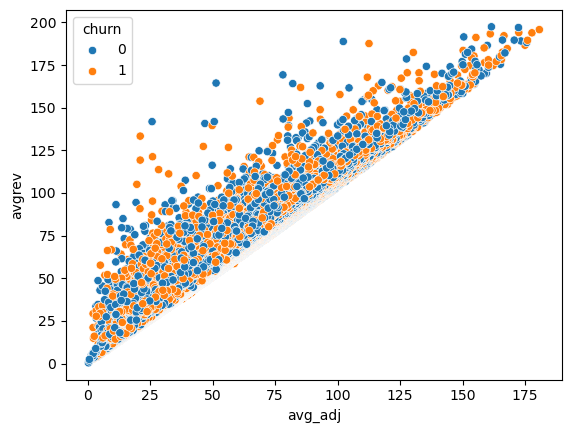

In [35]:
sns.scatterplot(data = df, x = 'avg_adj', y='avgrev', hue = 'churn')

In [36]:
new_features.append('billing_diff')
df['billing_diff'] = df['avgrev'] - df['avg_adj']

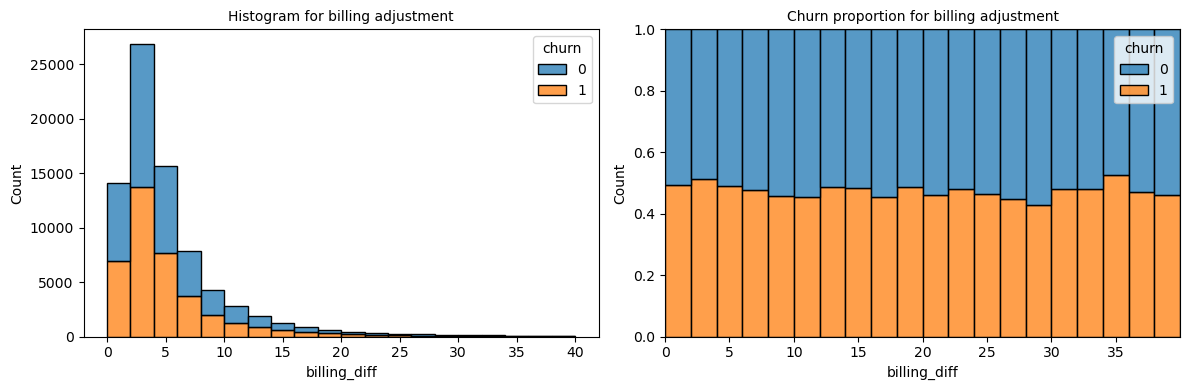

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data = df[df['billing_diff']<40], x = 'billing_diff', hue = 'churn', bins = 20, multiple="stack", ax = ax[0])
ax[0].set_title('Histogram for billing adjustment',fontsize = fontsize_title)

# Right plot - Box plot
sns.histplot(data = df[df['billing_diff']<40], x = 'billing_diff', hue = 'churn', bins = 20, multiple="fill", ax = ax[1])
ax[1].set_title('Churn proportion for billing adjustment', fontsize = fontsize_title)
plt.tight_layout()

plt.show()

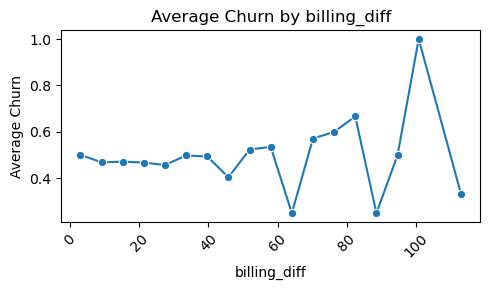

In [38]:
linear_mean_churn_plot(df = df, feature = 'billing_diff', nbins = 20)

In [39]:
df[df['billing_diff'] <0.5].churn.mean()

0.43333333333333335

In [40]:
df[df['billing_diff'] >20].churn.mean()

0.4675023212627669

### Key insights for billing adjustment

- Billing adjustment seems to represent the total correct amount the customer should have paid.
- We created a variable to calculate the difference between the average and adjusted revenue.
- There doesn't seem to be any strong factor indicating that higher adjustments lead to higher churn.
- We will ignore these variables.
- They are strongly correlated with the total variables over the customer lifetime, so we can discard them.

In [41]:
columns_to_drop = ['billing_diff', 'avg_adj', 'adjrev', 'adjmou', 'adjqty']

## 1.2.4 Blocked or dropped calls

In [42]:
features = ['drop_blk_Mean']

In [43]:
df[numerical_features].corr().abs()['drop_blk_Mean'].sort_values(ascending = False).iloc[:15]

drop_blk_Mean    1.000000
attempt_Mean     0.680172
plcd_vce_Mean    0.679193
complete_Mean    0.635883
comp_vce_Mean    0.635040
opk_vce_Mean     0.577352
peak_vce_Mean    0.563895
avg3qty          0.555684
avg3mou          0.529772
mou_Mean         0.528982
avg6qty          0.527955
mou_cvce_Mean    0.523198
unan_vce_Mean    0.514829
mou_peav_Mean    0.513186
recv_vce_Mean    0.506509
Name: drop_blk_Mean, dtype: float64

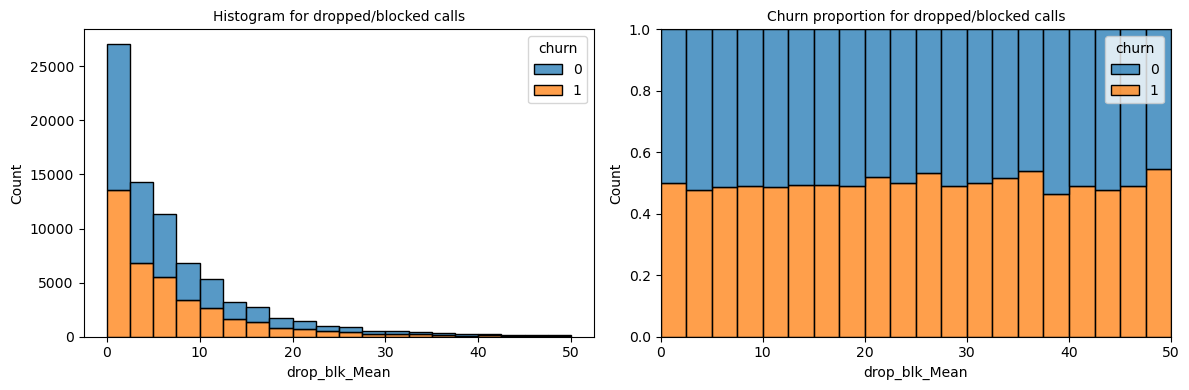

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data = df[df['drop_blk_Mean']<60], x = 'drop_blk_Mean', hue = 'churn', bins = 20, multiple="stack", ax = ax[0])
ax[0].set_title('Histogram for dropped/blocked calls',fontsize = fontsize_title)

# Right plot - Box plot
sns.histplot(data = df[df['drop_blk_Mean']<60], x = 'drop_blk_Mean', hue = 'churn', bins = 20, multiple="fill", ax = ax[1])
ax[1].set_title('Churn proportion for dropped/blocked calls', fontsize = fontsize_title)
plt.tight_layout()

plt.show()

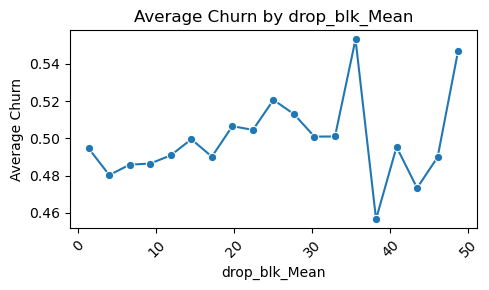

In [45]:
linear_mean_churn_plot(df = df, feature = 'drop_blk_Mean', nbins = 20)

Text(0.5, 1.0, 'Histogram for drop/placed calls ratio')

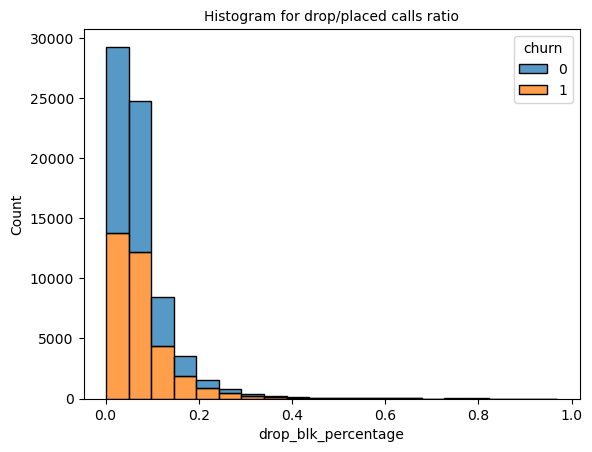

In [46]:
new_features.append('drop_blk_percentage')
df['drop_blk_percentage'] = (df['drop_blk_Mean'])/(df['attempt_Mean'])

sns.histplot(data = df[ (df['drop_blk_percentage']<1) & (df['drop_blk_percentage']>0)], x = 'drop_blk_percentage', hue = 'churn', bins = 20, multiple="stack")
plt.title('Histogram for drop/placed calls ratio',fontsize = fontsize_title)

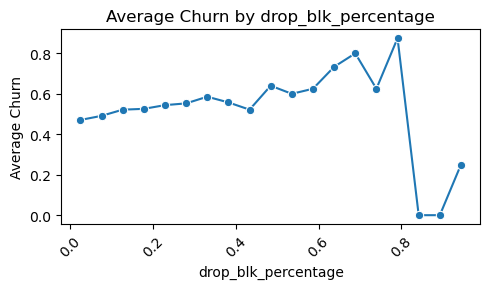

In [47]:
linear_mean_churn_plot(df = df[df['drop_blk_percentage']<1], feature = 'drop_blk_percentage', nbins = 20)

**Key insights for dropped or blocked calls**
- The more blocked or dropped calls, the higher the probability of churn. However, for values above 30, the number of cases was small and fluctuations appeared.
- We tested a variable for blocked/complete calls to analyze it in proportion to the total number of calls attempted by the customer. It seems to be a feature with a greater impact on churn.
- We need to understand why some customers have these high numbers of problematic calls. Is it an issue on the company's side or the customer's side?

## 1.2.5 Peak hour

In [48]:
features = ['peak_vce_Mean','mou_peav_Mean', 'opk_vce_Mean','mou_opkv_Mean']

In [49]:
df[numerical_features].corr().abs()[features].sort_values(by = features[0], ascending = False)

peak_vce_Mean  mou_peav_Mean  opk_vce_Mean  mou_opkv_Mean
peak_vce_Mean         1.000000       0.864101      0.652497       0.448677
comp_vce_Mean         0.902355       0.783872      0.861165       0.658131
complete_Mean         0.899251       0.781316      0.859736       0.657345
plcd_vce_Mean         0.886398       0.770174      0.858313       0.663480
attempt_Mean          0.884127       0.768328      0.857354       0.662958
mou_peav_Mean         0.864101       1.000000      0.529316       0.528260
avg3qty               0.798197       0.660253      0.789005       0.551295
recv_vce_Mean         0.783219       0.622967      0.802796       0.532424
avg6qty               0.751672       0.617808      0.750467       0.520010
inonemin_Mean         0.706940       0.504008      0.746182       0.446811
mou_rvce_Mean         0.693910       0.727243      0.733666       0.701838
avgqty                0.680115       0.552451      0.691187       0.469387
unan_vce_Mean         0.676785       0.578518      0.692083       0.547005
owylis_vce_Mean       0.669528       0.568779      0.718216       0.519123
mou_Mean              0.667946       0.731629      0.715571       0.779853
avg3mou               0.665656       0.730456      0.709968       0.775694
opk_vce_Mean          0.652497       0.529316      1.000000       0.762731
mou_cvce_Mean         0.637459       0.785486      0.651135       0.873047
avg6mou               0.625312       0.681981      0.675003       0.727299
adjqty                0.586788       0.479885      0.487133       0.296838
totcalls              0.586311       0.479183      0.486315       0.295626
drop_blk_Mean         0.563895       0.513186      0.577352       0.472397
mouowylisv_Mean       0.562552       0.561353      0.612286       0.541371
avgmou                0.560889       0.607198      0.617880       0.650615
rev_Mean              0.547331       0.604803      0.374510       0.340034
avg3rev               0.536828       0.595517      0.365835       0.334134
totmou                0.535892       0.577773      0.472719       0.474756
adjmou                0.535865       0.577964      0.473290       0.475929
avg6rev               0.523841       0.575473      0.363299       0.328160
iwylis_vce_Mean       0.511793       0.401085      0.552964       0.371120
avgrev                0.486892       0.535176      0.349791       0.315670
mou_opkv_Mean         0.448677       0.528260      0.762731       1.000000
mouiwylisv_Mean       0.444981       0.449113      0.489624       0.444261
ovrmou_Mean           0.414888       0.463130      0.296841       0.265623
ovrrev_Mean           0.400124       0.443463      0.297989       0.268143
totmrc_Mean           0.381837       0.429596      0.269656       0.276460
totrev                0.335119       0.370758      0.139199       0.107132
custcare_bool         0.331539       0.327456      0.370037       0.364482
adjrev                0.329634       0.363970      0.134182       0.101344
custcare_Mean         0.274162       0.260698      0.364645       0.384587
eqpdays               0.182503       0.157708      0.248845       0.211696
hnd_price             0.127777       0.118068      0.174356       0.144785
change_rev            0.050276       0.064185      0.028358       0.032702
change_mou            0.049155       0.060669      0.034483       0.047484
churn                 0.026360       0.027803      0.030174       0.039658
months                0.011774       0.016425      0.124673       0.140498

These features seem to correlate greatly with variables that scale with the number of calls.

Peak hours also have a higher correlation with the number of unanswered calls, indicating that people are less likely to receive calls during that time.

These four variables have a high correlation with several others. If they don't help differentiate churn, it would be good to drop them.

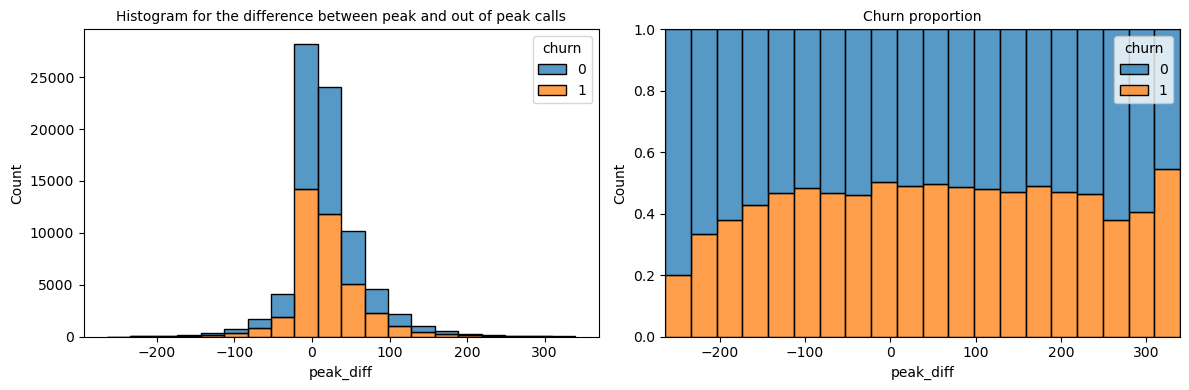

In [50]:
df['peak_diff'] = df['peak_vce_Mean'] - df['opk_vce_Mean']

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data = df, x = 'peak_diff', hue = 'churn', bins = 20, multiple="stack", ax = ax[0])
ax[0].set_title('Histogram for the difference between peak and out of peak calls',fontsize = fontsize_title)

# Right plot - Box plot
sns.histplot(data = df, x = 'peak_diff', hue = 'churn', bins = 20, multiple="fill", ax = ax[1])
ax[1].set_title('Churn proportion', fontsize = fontsize_title)
plt.tight_layout()

plt.show()

para a grande maioria das pessoas se encontra entre 100 e -100, e o churn não parece variar significativamente nessa região. Vamos apenas dropar

In [51]:
columns_to_drop.extend(['peak_vce_Mean','mou_peav_Mean', 'opk_vce_Mean','mou_opkv_Mean','peak_diff'])

### Key insights for peak hour

- These features have high correlation with many other.
- For the vast majority of people, the values are between 100 and -100, and churn does not seem to vary significantly in this range.
- Let's just drop it.


## 1.2.6 Area distribution

In [52]:
area_names = df.groupby('area').agg({'area': 'count', 'churn': 'mean'}).rename(columns = {'area':'count'}).reset_index()
area_names

area  count     churn
0             ATLANTIC SOUTH AREA   4876  0.488925
1           CALIFORNIA NORTH AREA   4593  0.520793
2        CENTRAL/SOUTH TEXAS AREA   3110  0.471061
3                    CHICAGO AREA   4018  0.495520
4                     DALLAS AREA   4238  0.479235
5       DC/MARYLAND/VIRGINIA AREA   5180  0.459653
6                GREAT LAKES AREA   3638  0.475536
7                    HOUSTON AREA   3349  0.462526
8                LOS ANGELES AREA   5080  0.493701
9                    MIDWEST AREA   5161  0.451269
10               NEW ENGLAND AREA   4461  0.512665
11             NEW YORK CITY AREA   8397  0.504109
12             NORTH FLORIDA AREA   3639  0.510855
13  NORTHWEST/ROCKY MOUNTAIN AREA   3468  0.563725
14                      OHIO AREA   3839  0.460797
15              PHILADELPHIA AREA   1883  0.509294
16             SOUTH FLORIDA AREA   2481  0.534865
17                 SOUTHWEST AREA   4828  0.511392
18                 TENNESSEE AREA   2123  0.467734

In [53]:
area_coordinates = {
    "NEW YORK CITY AREA": (40.7128, -74.0060),
    "DC/MARYLAND/VIRGINIA AREA": (38.8951, -77.0364),
    "MIDWEST AREA": (40.0, -89.0),
    "LOS ANGELES AREA": (34.0522, -118.2437),
    "ATLANTIC SOUTH AREA": (33.0, -81.0),
    "SOUTHWEST AREA": (35.0, -106.0),  # General area for the Southwest
    "CALIFORNIA NORTH AREA": (37.7749, -122.4194),
    "NEW ENGLAND AREA": (42.4072, -71.3824),
    "DALLAS AREA": (32.7767, -96.7970),
    "CHICAGO AREA": (41.8781, -87.6298),
    "OHIO AREA": (40.4173, -82.9071),
    "NORTH FLORIDA AREA": (30.3322, -81.6557),
    "GREAT LAKES AREA": (42.0, -87.0),
    "NORTHWEST/ROCKY MOUNTAIN AREA": (39.7392, -104.9903),
    "HOUSTON AREA": (29.7604, -95.3698),
    "CENTRAL/SOUTH TEXAS AREA": (31.0, -99.0),
    "SOUTH FLORIDA AREA": (25.7617, -80.1918),
    "TENNESSEE AREA": (35.5175, -86.5804),
    "PHILADELPHIA AREA": (39.9526, -75.1652)
}

usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = usa[usa['continent'] == 'North America']

# Function to get latitude and longitude
def geocode_area(area_name):
    geolocator = Nominatim(user_agent="geoapi")
    location = geolocator.geocode(area_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Get coordinates for each area
data_count = []
data_churn = []
for i in range(len(area_names)):
    area = area_names.iloc[i]['area']
    churn = area_names.iloc[i]['churn']
    count = area_names.iloc[i]['count']
    #lat, lon = geocode_area(area)
    lat, lon = area_coordinates[area]
    if lat is None or lon is None:
        print(f"Failed to geocode: {area}")
    else:
        data_count.append({'Area': area, 'Latitude': lat, 'Longitude': lon, 'Value': count})  # Example value = 1
        data_churn.append({'Area': area, 'Latitude': lat, 'Longitude': lon, 'Value': churn})  # Example value = 1

    #sleep(1)

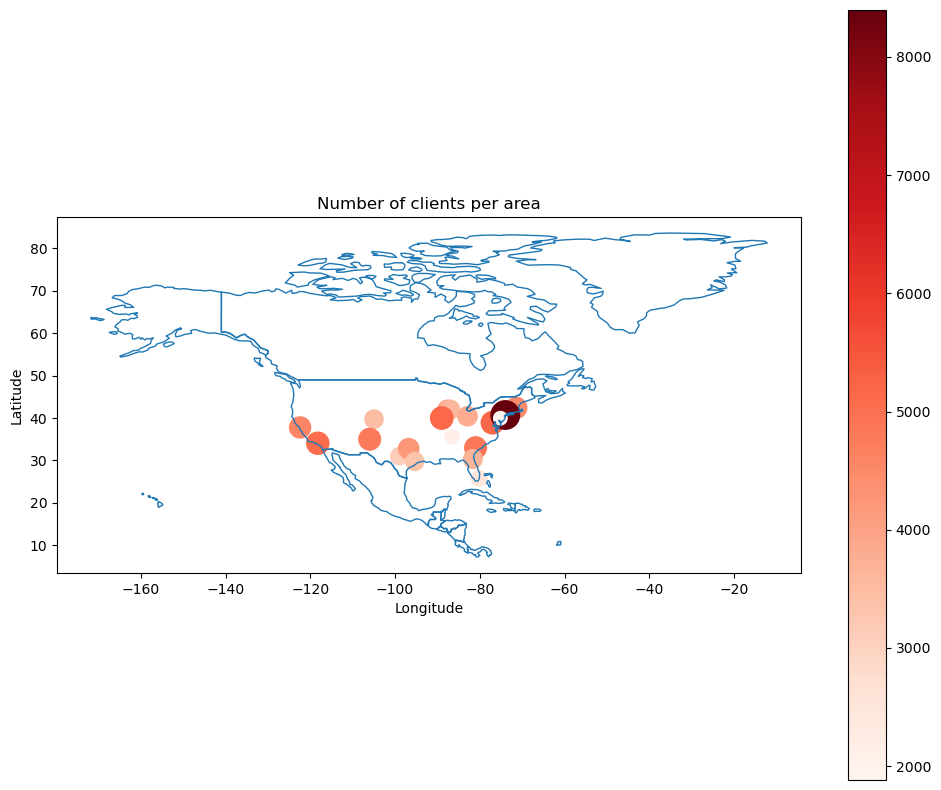

In [54]:
# Convert to DataFrame
df_geo = pd.DataFrame(data_count)

#df_geo = df_geo[df_geo['Longitude'] < -50]

# Convert the pandas DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df_geo, geometry=gpd.points_from_xy(df_geo['Longitude'], df_geo['Latitude']))

# Plot the USA map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
usa.boundary.plot(ax=ax, linewidth=1)

# Plot the data points as a heatmap (proportional circles)
gdf.plot(column='Value', cmap='Reds', ax=ax, legend=True, markersize=gdf['Value']/20)

# Set title and labels
plt.title('Number of clients per area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

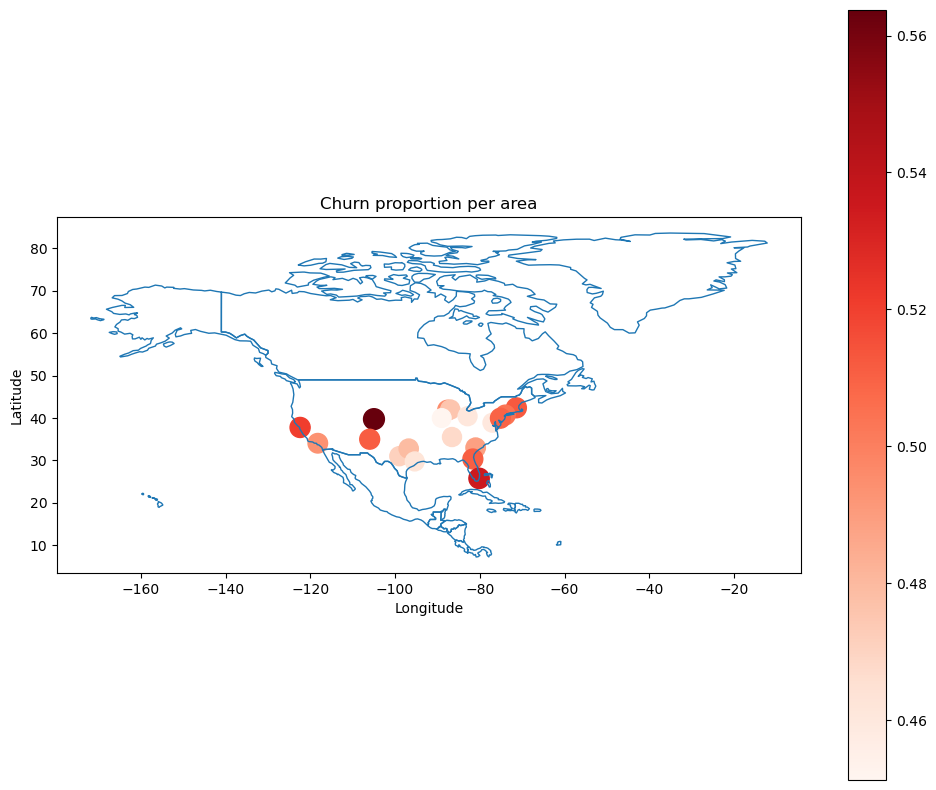

In [55]:
# Convert to DataFrame
df_geo = pd.DataFrame(data_churn)

#df_geo = df_geo[df_geo['Longitude'] < -50]

# Convert the pandas DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df_geo, geometry=gpd.points_from_xy(df_geo['Longitude'], df_geo['Latitude']))

# Plot the USA map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
usa.boundary.plot(ax=ax, linewidth=1)

# Plot the data points as a heatmap (proportional circles)
gdf.plot(column='Value', cmap='Reds', ax=ax, legend=True, markersize=gdf['Value']*400)

# Set title and labels
plt.title('Churn proportion per area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

### Key insights for area

- The number of customers seems to be well distributed, with a high concentration in New York.
- It is noted that states further away from the center had higher churn rates.
- It would be interesting to study if the increase in churn at the edges is related to any signal issues from the company.
- The highest churn peak was for the NORTHWEST/ROCKY MOUNTAIN AREA, with a churn rate of 56%.
- Location appears to be an important feature for the churn model.

## 1.2.7 Months

In [56]:
features = ['months']

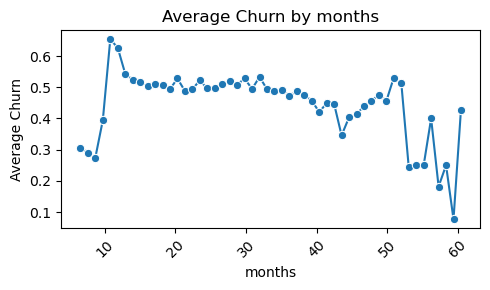

In [57]:
linear_mean_churn_plot(df = df, feature = 'months', nbins = 53)

- Nos primeiros meses, o churn é baixo.
- Existe um pico entre 11~13 meses de altissimo churn, onde deve se concentrar pessoas esperando o final do plano para cancelarem.
- Depois o churn parece decrescer lentamente com os meses, o que pode ser um indicativo de **sinais de lealdade**
- É possível que o plano adquirido pelo cliente com vencimento de 12 meses não satisfaça suas necessidades, e se mantenham apenas para evitar multas. Seria interessante entrar em contato e propor alterações no plano de forma a acomodar as novas necessidades.

- Vamos dividir nossa análise aqui em trÊs grupos:
    - Clientes com menos de 11 meses
    - Clientes entre 11 e 14 meses
    - Clientes com mais de 14 meses

In [58]:
new_features.append('month_segmentation')

df['month_segmentation'] = np.where(df['months']<=11, '<12','12-14')
df['month_segmentation'] = np.where(df['months']>14, '>14',df['month_segmentation'])
df['month_segmentation'].value_counts()

month_segmentation
>14      44537
<12      20708
12-14    13117
Name: count, dtype: int64

In [59]:
df[list(numerical_features) + ['month_segmentation']].groupby('month_segmentation').mean()

rev_Mean    mou_Mean  totmrc_Mean  ovrmou_Mean  \
month_segmentation                                                    
12-14               49.178348  409.555942    44.304101    25.726957   
<12                 50.010755  432.079430    45.877913    24.747642   
>14                 48.411205  338.703427    40.842441    23.331536   

                    ovrrev_Mean  change_mou  change_rev  unan_vce_Mean  \
month_segmentation                                                       
12-14                  8.850855   -9.430761   -1.448274      19.635587   
<12                    8.899189  -12.348601   -1.443869      22.069393   
>14                    7.882299   -7.897109   -1.421106      18.344942   

                    plcd_vce_Mean  recv_vce_Mean  comp_vce_Mean  \
month_segmentation                                                
12-14                  104.862596      35.968845      79.517217   
<12                    114.260898      37.541417      85.651133   
>14                    101.432143      34.184873      77.641654   

                    custcare_Mean  inonemin_Mean  mou_cvce_Mean  \
month_segmentation                                                
12-14                    1.278036      18.992503     169.486150   
<12                      1.724261      19.681250     190.886515   
>14                      0.986738      18.180808     158.727074   

                    mou_rvce_Mean  owylis_vce_Mean  mouowylisv_Mean  \
month_segmentation                                                    
12-14                   73.442457        17.497192        18.816740   
<12                     78.454582        18.358879        19.915279   
>14                     67.065587        16.747678        17.633660   

                    iwylis_vce_Mean  mouiwylisv_Mean  peak_vce_Mean  \
month_segmentation                                                    
12-14                      4.670428        10.037827      61.930065   
<12                        4.986784        10.913439      64.327200   
>14                        4.445876         9.260284      65.135954   

                    mou_peav_Mean  opk_vce_Mean  mou_opkv_Mean  drop_blk_Mean  \
month_segmentation                                                              
12-14                  121.774768     47.463521     121.105048       6.944576   
<12                    126.911865     52.440892     142.394477       7.913222   
>14                    127.426076     40.854645      98.340097       6.574204   

                    attempt_Mean  complete_Mean     churn     months  \
month_segmentation                                                     
12-14                 105.479632      80.079820  0.568880  12.907906   
<12                   115.116654      86.419307  0.425053   9.147769   
>14                   101.801858      77.970579  0.501763  24.006152   

                       totcalls       totmou       totrev       adjrev  \
month_segmentation                                                       
12-14               1647.888237  4945.542769   659.998530   586.630713   
<12                 1168.519171  3604.237879   480.715602   405.448357   
>14                 2562.017356  6655.035188  1095.427547  1032.442547   

                         adjmou       adjqty     avgrev      avgmou  \
month_segmentation                                                    
12-14               4885.025959  1626.659983  50.532488  421.066634   
<12                 3539.657620  1146.663319  51.392454  450.287124   
>14                 6557.588122  2521.768709  48.721437  318.356038   

                        avgqty     avg3mou     avg3qty    avg3rev     avg6mou  \
month_segmentation                                                              
12-14               140.204146  413.197301  137.770603  49.707555  419.784097   
<12                 145.651725  437.356819  142.367443  50.645210  446.332818   
>14                 121.168354  341.491075  124.563711  48.820239  341.047174   

          

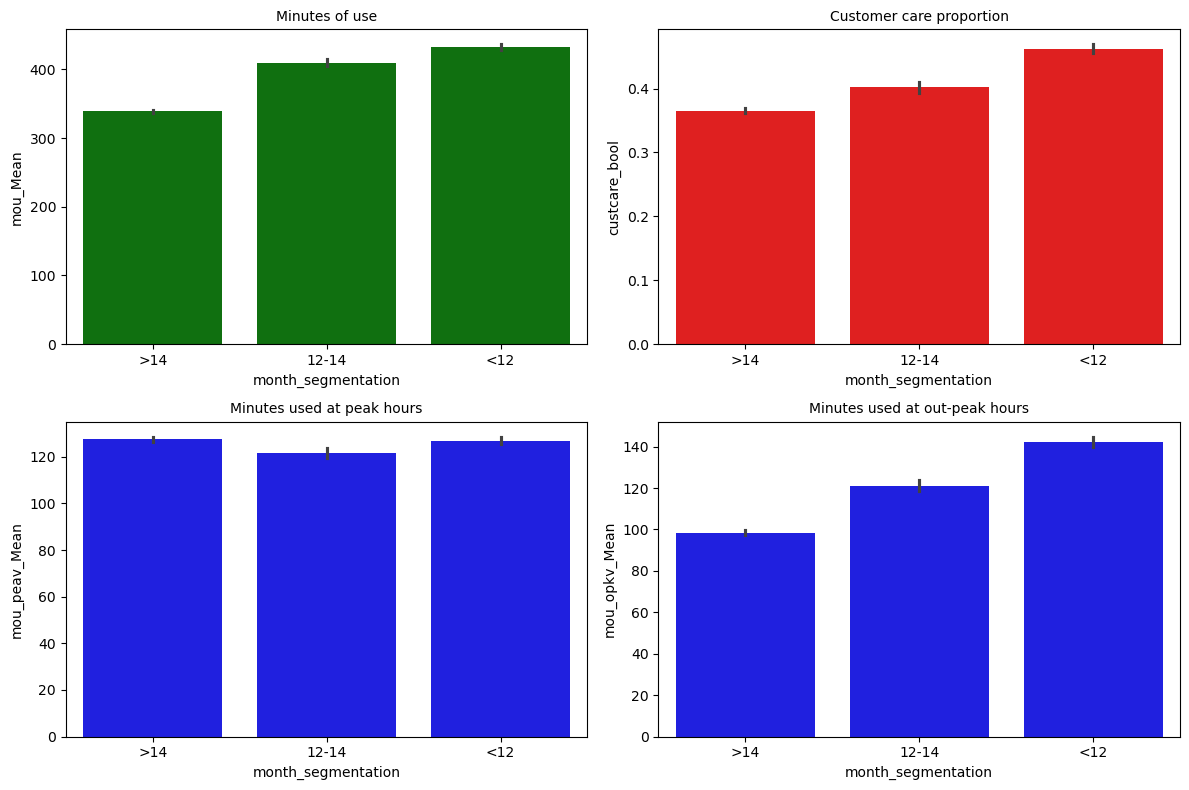

In [60]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.barplot(data=df, x = 'month_segmentation', y = 'mou_Mean', color = 'green', ax = ax[0, 0])
ax[0, 0].set_title('Minutes of use',fontsize = fontsize_title)

sns.barplot(data=df, x = 'month_segmentation', y = 'custcare_bool', color = 'red', ax = ax[0, 1])
ax[0, 1].set_title('Customer care proportion', fontsize = fontsize_title)

sns.barplot(data=df, x = 'month_segmentation', y = 'mou_peav_Mean', color = 'blue', ax = ax[1,0])
ax[1,0].set_title('Minutes used at peak hours', fontsize = fontsize_title)

sns.barplot(data=df, x = 'month_segmentation', y = 'mou_opkv_Mean', color = 'blue', ax = ax[1,1])
ax[1,1].set_title('Minutes used at out-peak hours', fontsize = fontsize_title)

plt.tight_layout()

plt.show()



- Pessoas com menos de 12 meses tiveram maiores variações de change_mou
- A quantidade de minutos utilizados por clientes com mais de 14 meses foi bem menor que as de 12 meses pra baixo. Isso pode ser um indicativo que pessoas com alta demanda de minutos não estejam satisfeitas com os planos.
- Interessante que os revenues foram próximos. Vale investigar o motivo dos clientes de mais tempo usam menos o serviço pagando o mesmo.
- As pessoas com menos de 12 meses também apresentaram maior quantidade de chamada ao suporte
- Pessoas com menos de 12 meses fizeram muito mais chamadas em horário fora do pico.

Vamos analisar por ultimo, se o impacto das variáveis totais no churn é devido a esse comportamento dos 12 meses.

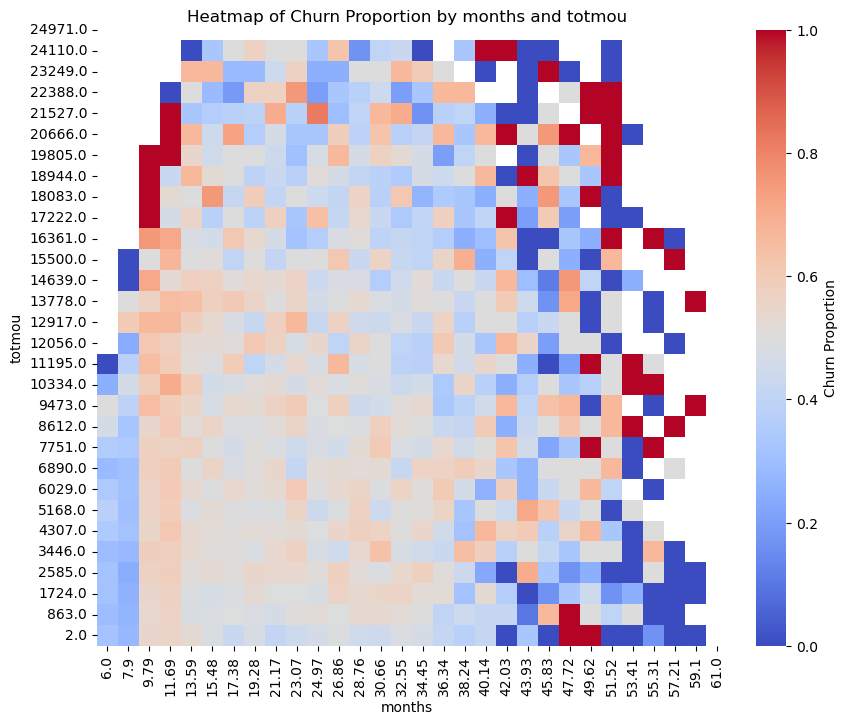

In [61]:
plot_heatmap_churn_density(df=df, nbins = 30, x_column = 'months' , y_column = 'totmou')

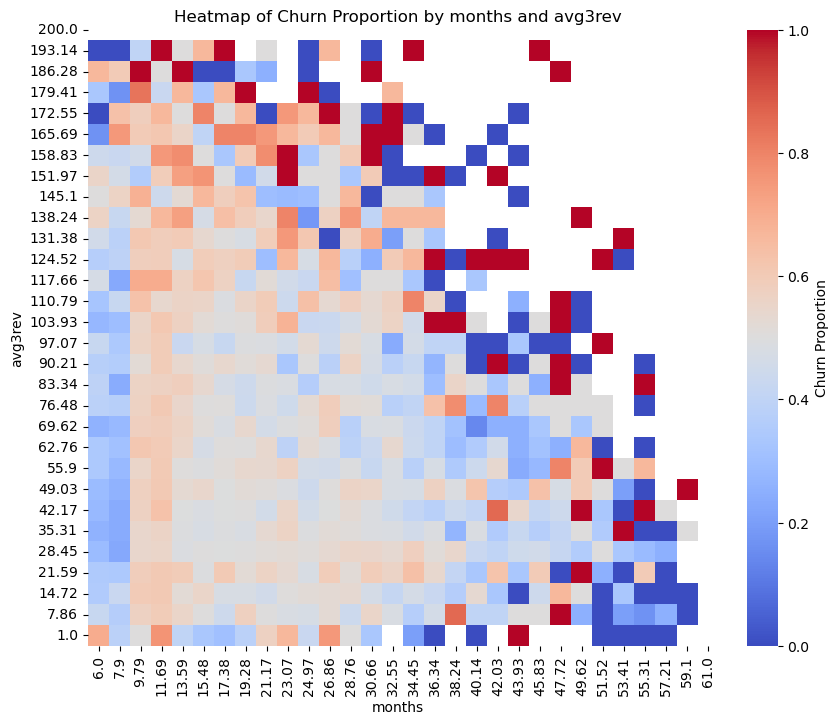

In [62]:
plot_heatmap_churn_density(df=df, nbins = 30, x_column = 'months' , y_column = 'avg3rev')

- Para um mesmo valor de totrev, o pico de saída é aos 12 meses. Não se nota nenhum outro padrão interessante nos valores. Vamos dropar as colunas relacionadas a grandezas totais
- Por outro lado, ao utilizarmos a grandeza avg3rev é possível notar não apenas a tendência de saída aos 12 meses, mas também a tendência de saída associado a valores mais altos de revenue ao longo de diversos meses. **A maioria dos clientes que se mantiveram por muitos periodos possuem um ticket mais baixo**
- Quanto maior o revenue, mais rapido tende a ser a saída.


In [63]:
columns_to_drop.extend(['totrev','totmou','totcalls'])

In [64]:
columns_to_drop

['billing_diff',
 'avg_adj',
 'adjrev',
 'adjmou',
 'adjqty',
 'peak_vce_Mean',
 'mou_peav_Mean',
 'opk_vce_Mean',
 'mou_opkv_Mean',
 'peak_diff',
 'totrev',
 'totmou',
 'totcalls']

## 1.2.8 Customer care calls

Na sessão de limpeza, transformamos as chamadas para suporte em um booleano para mensurarmos se o cliente precisou ou não ligar para o suporte. Vamos analisar se essa variável se relaciona com alguma outra

In [65]:
customer_care_df = df[list(numerical_features)].groupby('custcare_bool').mean()
customer_care_df

rev_Mean    mou_Mean  totmrc_Mean  ovrmou_Mean  ovrrev_Mean  \
custcare_bool                                                                 
0              44.812532  290.350045    40.328313    19.099366     6.484454   
1              55.263276  504.133001    46.433508    31.709817    11.089809   

               change_mou  change_rev  unan_vce_Mean  plcd_vce_Mean  \
custcare_bool                                                         
0               -4.486776   -0.518061      13.447593      75.390869   
1              -16.684325   -2.818875      28.803724     150.956539   

               recv_vce_Mean  comp_vce_Mean  custcare_Mean  inonemin_Mean  \
custcare_bool                                                               
0                  25.063314      57.784581        0.00000      13.295785   
1                  51.020740     113.913324        3.09861      26.938874   

               mou_cvce_Mean  mou_rvce_Mean  owylis_vce_Mean  mouowylisv_Mean  \
custcare_bool                                                                   
0                 116.157696      48.428772        12.473931        12.950076   
1                 249.301612     105.631072        24.625091        26.762303   

               iwylis_vce_Mean  mouiwylisv_Mean  peak_vce_Mean  mou_peav_Mean  \
custcare_bool                                                                   
0                     3.323618         6.885967      48.735900      94.302392   
1                     6.604534        14.293370      88.147834     174.995978   

               opk_vce_Mean  mou_opkv_Mean  drop_blk_Mean  attempt_Mean  \
custcare_bool                                                             
0                 29.867700      70.265871       5.006265     75.716449   
1                 68.033777     179.882739      10.002196    151.820992   

               complete_Mean     churn     months     totcalls       totmou  \
custcare_bool                                                                 
0                  58.076670  0.505990  18.937773  1760.349956  4686.879739   
1                 114.689013  0.472586  17.135011  2466.516197  6892.474115   

                   totrev      adjrev       adjmou       adjqty     avgrev  \
custcare_bool                                                                
0              833.326014  767.349994  4612.974592  1731.281018  45.614448   
1              900.745442  829.751110  6796.722590  2429.551131  55.980074   

                   avgmou      avgqty     avg3mou     avg3qty    avg3rev  \
custcare_bool                                                              
0              293.353189  106.126414  291.937392  104.860221  44.956314   
1              487.419170  168.326267  510.759995  171.897095  56.275742   

                  avg6mou     avg6qty    avg6rev   hnd_price     eqpdays  
custcare_bool                                                             
0              295.785484  106.001185  45.341764   94.513760  441.028807  
1              513.032041  173.103644  56.703529  105.149073  345.380415

In [66]:
(customer_care_df.iloc[1]/customer_care_df.iloc[0]).sort_values(ascending = False).iloc[:10]

custcare_Mean           inf
change_rev         5.441200
change_mou         3.718556
mou_opkv_Mean      2.560030
opk_vce_Mean       2.277838
mou_rvce_Mean      2.181164
mou_cvce_Mean      2.146234
unan_vce_Mean      2.141924
mouiwylisv_Mean    2.075724
mouowylisv_Mean    2.066575
dtype: float64

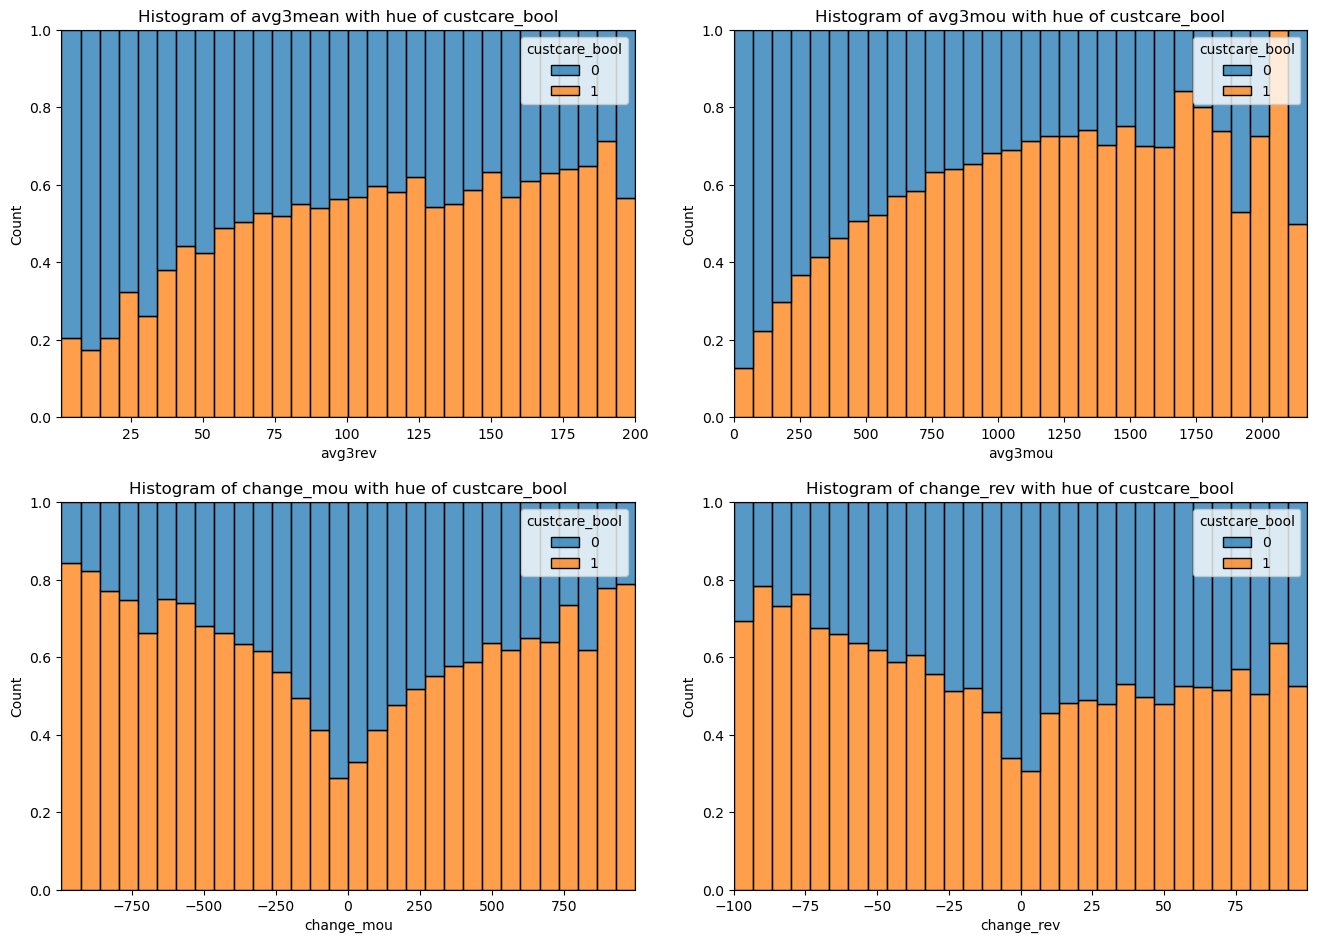

In [67]:

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Adjust the spacing between subplots
plt.tight_layout(pad=4.0)

# First plot (row 1, column 1) - avg3mean
sns.histplot(data=df, x='avg3rev', hue='custcare_bool', multiple='fill', ax=axes[0, 0], bins = 30)
axes[0, 0].set_title('Histogram of avg3mean with hue of custcare_bool')

# Second plot (row 1, column 2) - avg3mou
sns.histplot(data=df, x='avg3mou', hue='custcare_bool', multiple='fill', ax=axes[0, 1], bins = 30)
axes[0, 1].set_title('Histogram of avg3mou with hue of custcare_bool')

# Third plot (row 2, column 1) - change_mou
sns.histplot(data=df, x='change_mou', hue='custcare_bool', multiple='fill', ax=axes[1, 0], bins = 30)
axes[1, 0].set_title('Histogram of change_mou with hue of custcare_bool')

# Fourth plot (row 2, column 2) - change_rev
sns.histplot(data=df, x='change_rev', hue='custcare_bool', multiple='fill', ax=axes[1, 1], bins = 30)
axes[1, 1].set_title('Histogram of change_rev with hue of custcare_bool')

# Show the plot
plt.show()


- The higher the usage (and the higher the revenue), the greater the proportion of service usage.
- The greater the variation in minutes and revenue, the higher the proportion of customers who used customer support. Could this be related to plan changes or the company’s inability to adjust to changes in customer needs?
- There is also a difference in churn (47% vs 51%).

## 1.2.8 Received and completed calls

In [68]:
new_features.append('call_made_received')
df['call_made_received'] = (df['mou_rvce_Mean'] - df['mou_cvce_Mean'])

df['call_made_received_bool'] = df['call_made_received']>0
made_received_df = df[list(numerical_features) +['call_made_received_bool'] ].groupby('call_made_received_bool').mean()
made_received_df

rev_Mean    mou_Mean  totmrc_Mean  ovrmou_Mean  \
call_made_received_bool                                                    
False                    48.604066  370.463356    42.669976    23.342736   
True                     52.525995  422.744883    43.574120    31.706500   

                         ovrrev_Mean  change_mou  change_rev  unan_vce_Mean  \
call_made_received_bool                                                       
False                       8.049055   -8.520544   -1.424718      19.461622   
True                       10.940222  -17.384028   -1.500818      20.376688   

                         plcd_vce_Mean  recv_vce_Mean  comp_vce_Mean  \
call_made_received_bool                                                
False                       105.281421      31.271408      79.981532   
True                        106.541259      76.146037      80.974062   

                         custcare_Mean  inonemin_Mean  mou_cvce_Mean  \
call_made_received_bool                                                
False                         1.247556      16.730666     174.047418   
True                          1.059700      38.434246     119.081179   

                         mou_rvce_Mean  owylis_vce_Mean  mouowylisv_Mean  \
call_made_received_bool                                                    
False                        61.500536        16.960321        18.337956   
True                        167.057562        20.667086        19.396381   

                         iwylis_vce_Mean  mouiwylisv_Mean  peak_vce_Mean  \
call_made_received_bool                                                    
False                           4.181839         8.944842      62.532620   
True                            9.048710        18.605529      82.818059   

                         mou_peav_Mean  opk_vce_Mean  mou_opkv_Mean  \
call_made_received_bool                                               
False                       123.764335     43.098581     111.757223   
True                        152.007536     64.162755     134.039021   

                         drop_blk_Mean  attempt_Mean  complete_Mean     churn  \
call_made_received_bool                                                         
False                         6.934044    105.810816      80.456075  0.492585   
True                          7.547173    107.181894      81.553413  0.494132   

                            months     totcalls       totmou      totrev  \
call_made_received_bool                                                    
False                    18.173333  1976.907716  5474.856401  853.478537   
True                     18.705365  2675.869656  6436.276819  925.933262   

                             adjrev       adjmou       adjqty     avgrev  \
call_made_received_bool                                                    
False                    785.563010  5393.017670  1945.407463  49.425682   
True                     857.435708  6346.324039  2636.661498  52.761932   

                             avgmou      avgqty     avg3mou     avg3qty  \
call_made_received_bool                                                   
False                    366.055184  127.361517  373.795489  127.688767   
True                     413.761711  165.275106  428.883487  169.184828   

                           avg3rev     avg6mou     avg6qty    avg6rev  \
call_made_received_bool                                                 
False                    49.092565  376.991054  128.882422  49.494733   
True                     53.016904  432.371472  170.086756  53.420089   

                          hnd_price     eqpdays  custcare_bool  
call_made_received_bool                                         
False                     98.118747  405.023341       0.395624  
True                     104.885213  383.406259       0.411567

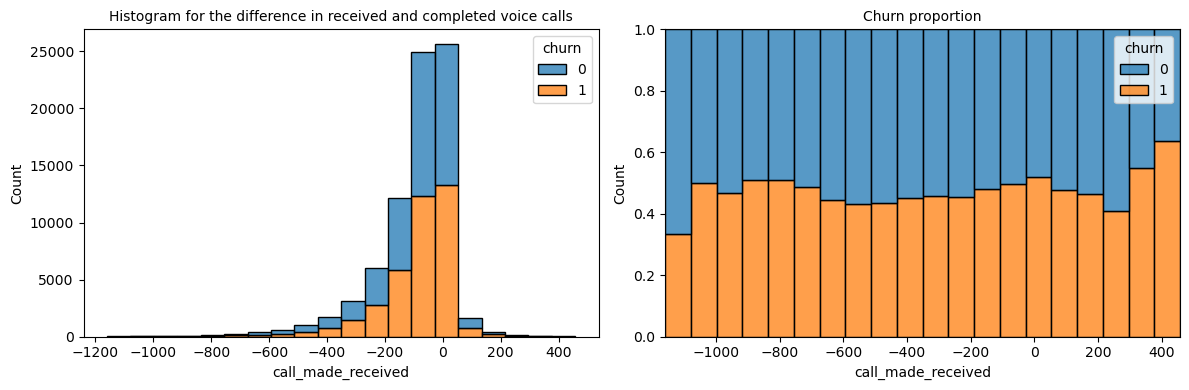

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data = df, x = 'call_made_received', hue = 'churn', bins = 20, multiple="stack", ax = ax[0])
ax[0].set_title('Histogram for the difference in received and completed voice calls',fontsize = fontsize_title)

# Right plot - Box plot
sns.histplot(data = df, x = 'call_made_received', hue = 'churn', bins = 20, multiple="fill", ax = ax[1])
ax[1].set_title('Churn proportion', fontsize = fontsize_title)
plt.tight_layout()

plt.show()

- The vast majority of people make more calls than they receive, with the average being close to zero.
- However, those who receive more calls are also the ones who make the most calls. They are likely businesses or individuals managing multiple contacts.
- We did not find a difference in churn related to this feature, so we can disregard variables associated with it.

In [70]:
columns_to_drop.extend(['call_made_received', 'call_made_received_bool', 'mou_rvce_Mean', 'mou_cvce_Mean'])

### 1.2.9 Inbound calls less than 1 minute

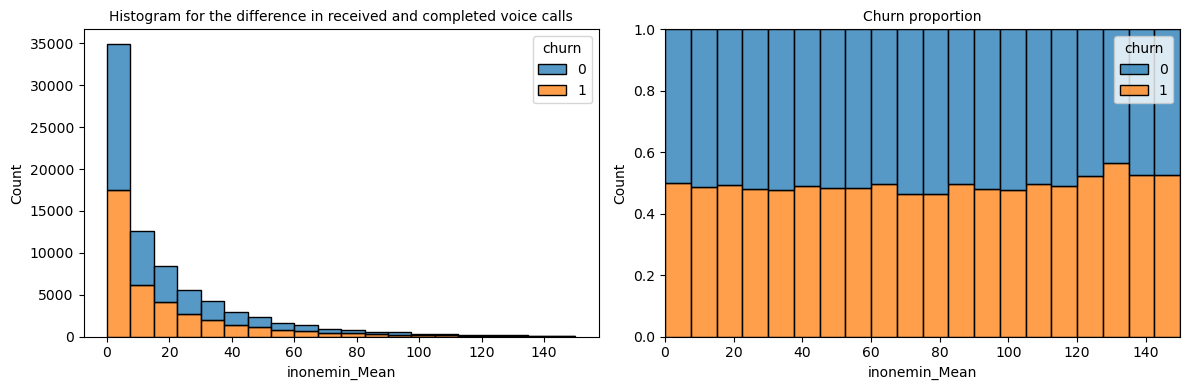

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data = df, x = 'inonemin_Mean', hue = 'churn', bins = 20, multiple="stack", ax = ax[0])
ax[0].set_title('Histogram for the difference in received and completed voice calls',fontsize = fontsize_title)

# Right plot - Box plot
sns.histplot(data = df, x = 'inonemin_Mean', hue = 'churn', bins = 20, multiple="fill", ax = ax[1])
ax[1].set_title('Churn proportion', fontsize = fontsize_title)
plt.tight_layout()

plt.show()

It doesn't seems to help to predict churn. **We should drop it**

In [72]:
#Low impacto on churn, lets just drop it
columns_to_drop.extend(['inonemin_Mean'])

## 1.2.10 Wireless-to-wireless voice calls

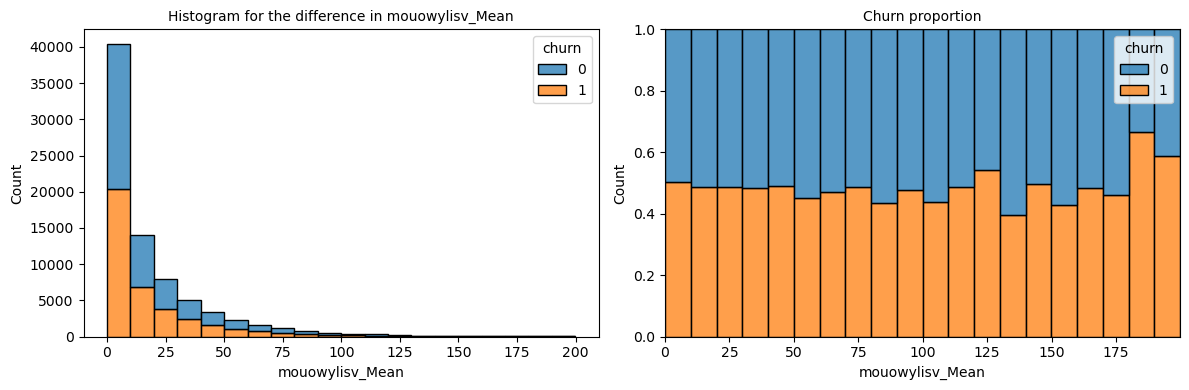

In [73]:
create_histplots(df = df, feature = 'mouowylisv_Mean', nbins = 20)

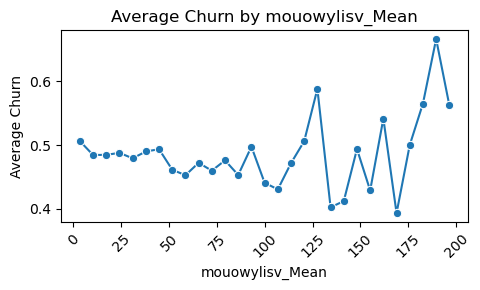

In [74]:
linear_mean_churn_plot(df = df, feature = 'mouowylisv_Mean', nbins = 30)

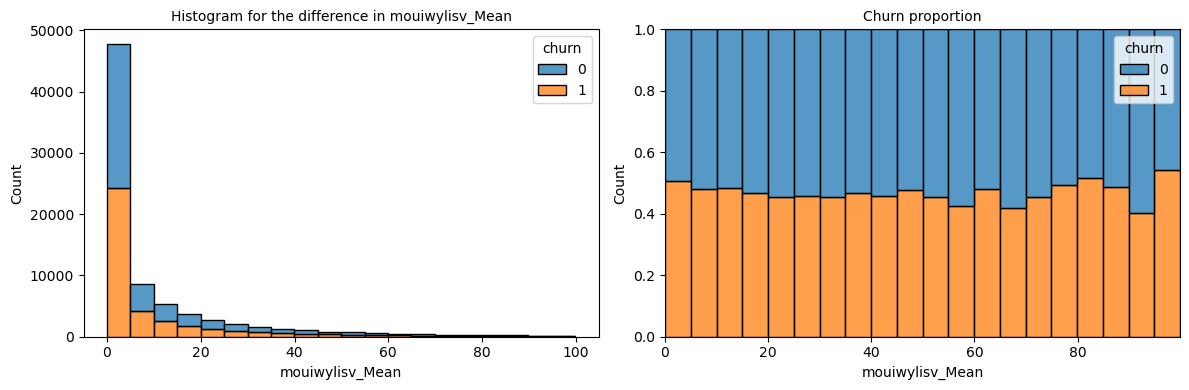

In [75]:
create_histplots(df = df, feature = 'mouiwylisv_Mean', nbins = 20)

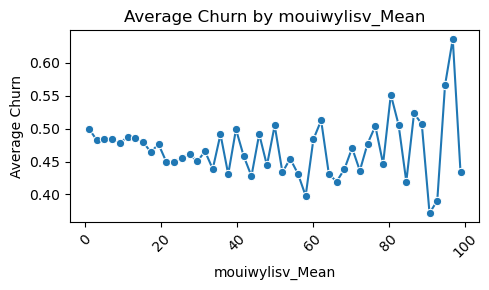

In [76]:
linear_mean_churn_plot(df = df, feature = 'mouiwylisv_Mean', nbins = 50)

- The impact on the churn for these variables is very small. We should just discart it

In [77]:
columns_to_drop.extend(['mouiwylisv_Mean', 'mouowylisv_Mean','owylis_vce_Mean','iwylis_vce_Mean'])

## 1.2.11 Voice calls

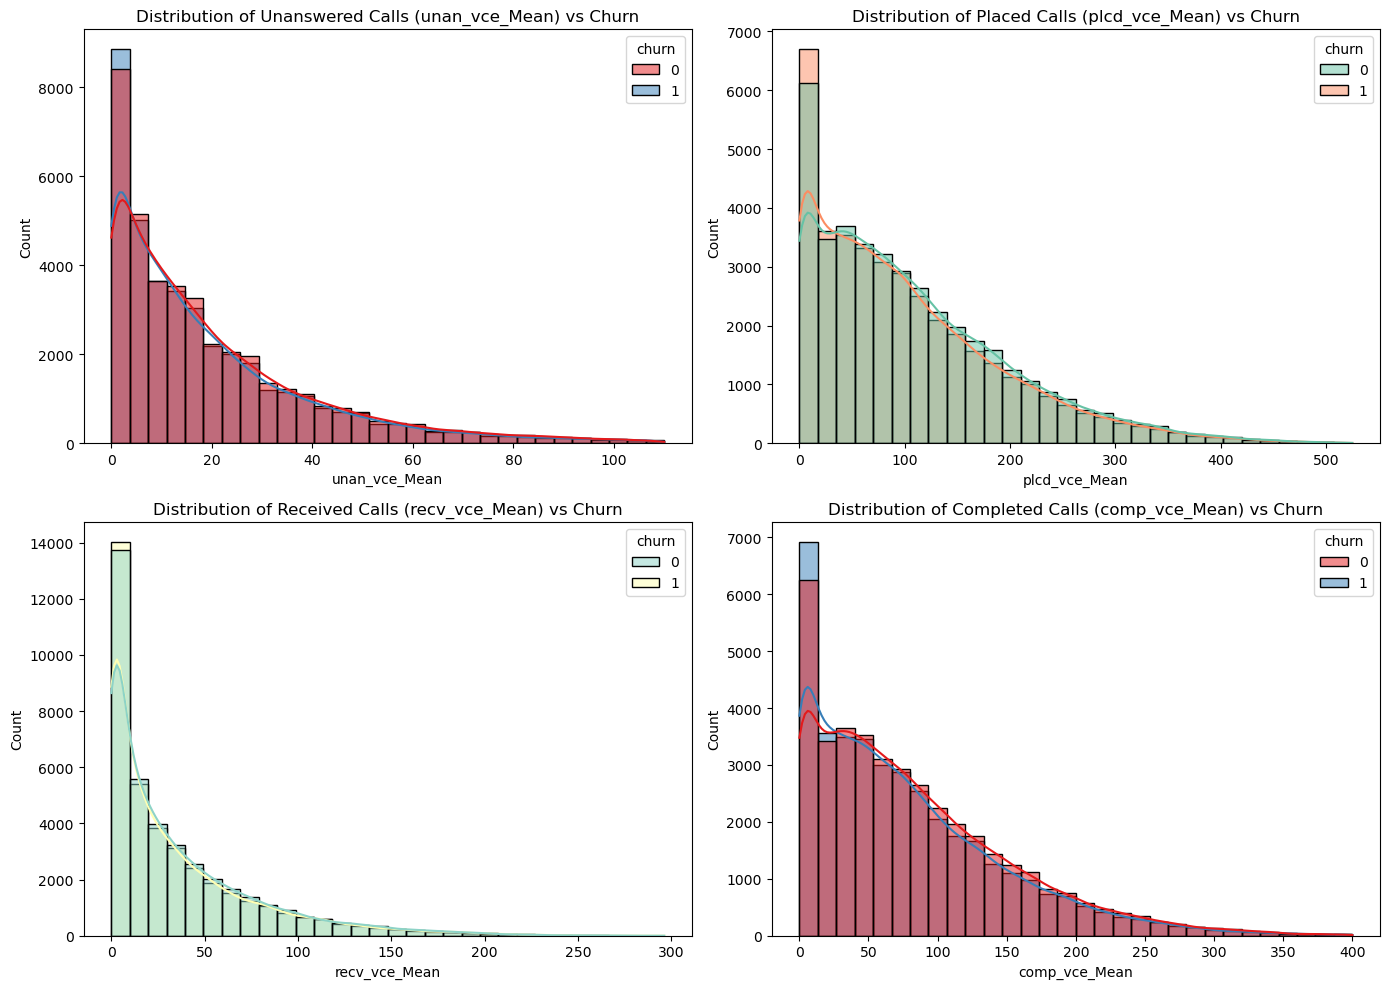

In [78]:
df['total_calls'] = df['unan_vce_Mean'] + df['plcd_vce_Mean'] + df['recv_vce_Mean'] + df['comp_vce_Mean']
df['unan_ratio'] = df['unan_vce_Mean'] / df['total_calls']

plt.figure(figsize=(14, 10))

# Distribuição de unan_vce_Mean em relação ao churn
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='unan_vce_Mean', hue='churn', kde=True, bins=30, palette='Set1')
plt.title('Distribution of Unanswered Calls (unan_vce_Mean) vs Churn')

# Distribuição de plcd_vce_Mean em relação ao churn
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='plcd_vce_Mean', hue='churn', kde=True, bins=30, palette='Set2')
plt.title('Distribution of Placed Calls (plcd_vce_Mean) vs Churn')

# Distribuição de recv_vce_Mean em relação ao churn
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='recv_vce_Mean', hue='churn', kde=True, bins=30, palette='Set3')
plt.title('Distribution of Received Calls (recv_vce_Mean) vs Churn')

# Distribuição de comp_vce_Mean em relação ao churn
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='comp_vce_Mean', hue='churn', kde=True, bins=30, palette='Set1')
plt.title('Distribution of Completed Calls (comp_vce_Mean) vs Churn')

plt.tight_layout()
plt.show()

In [79]:
mean_values = df.groupby('churn')[['unan_vce_Mean', 'plcd_vce_Mean', 'recv_vce_Mean', 'comp_vce_Mean', 'unan_ratio']].mean()
print("Mean values of variables by Churn:")
print(mean_values)

Mean values of variables by Churn:
       unan_vce_Mean  plcd_vce_Mean  recv_vce_Mean  comp_vce_Mean  unan_ratio
churn                                                                        
0          19.981862     108.018431      36.024855      82.278182    0.080955
1          19.095664     102.697159      34.696814      77.801076    0.082108


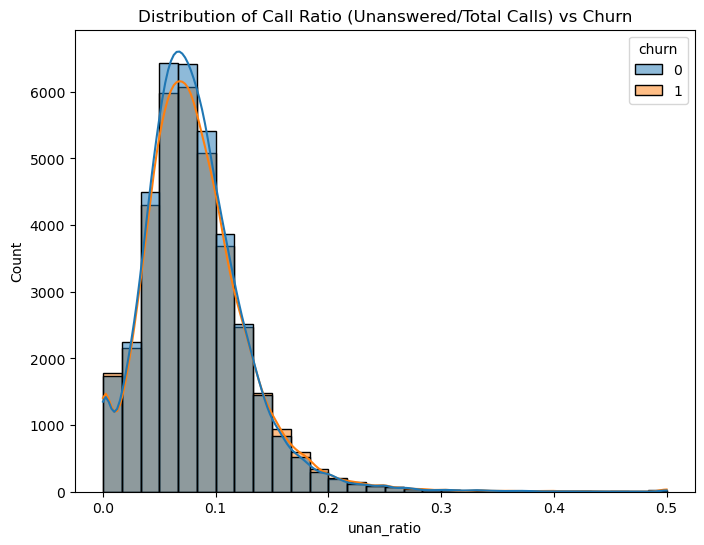

In [80]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='unan_ratio', hue='churn', kde=True, bins=30)
plt.title('Distribution of Call Ratio (Unanswered/Total Calls) vs Churn')
plt.show()

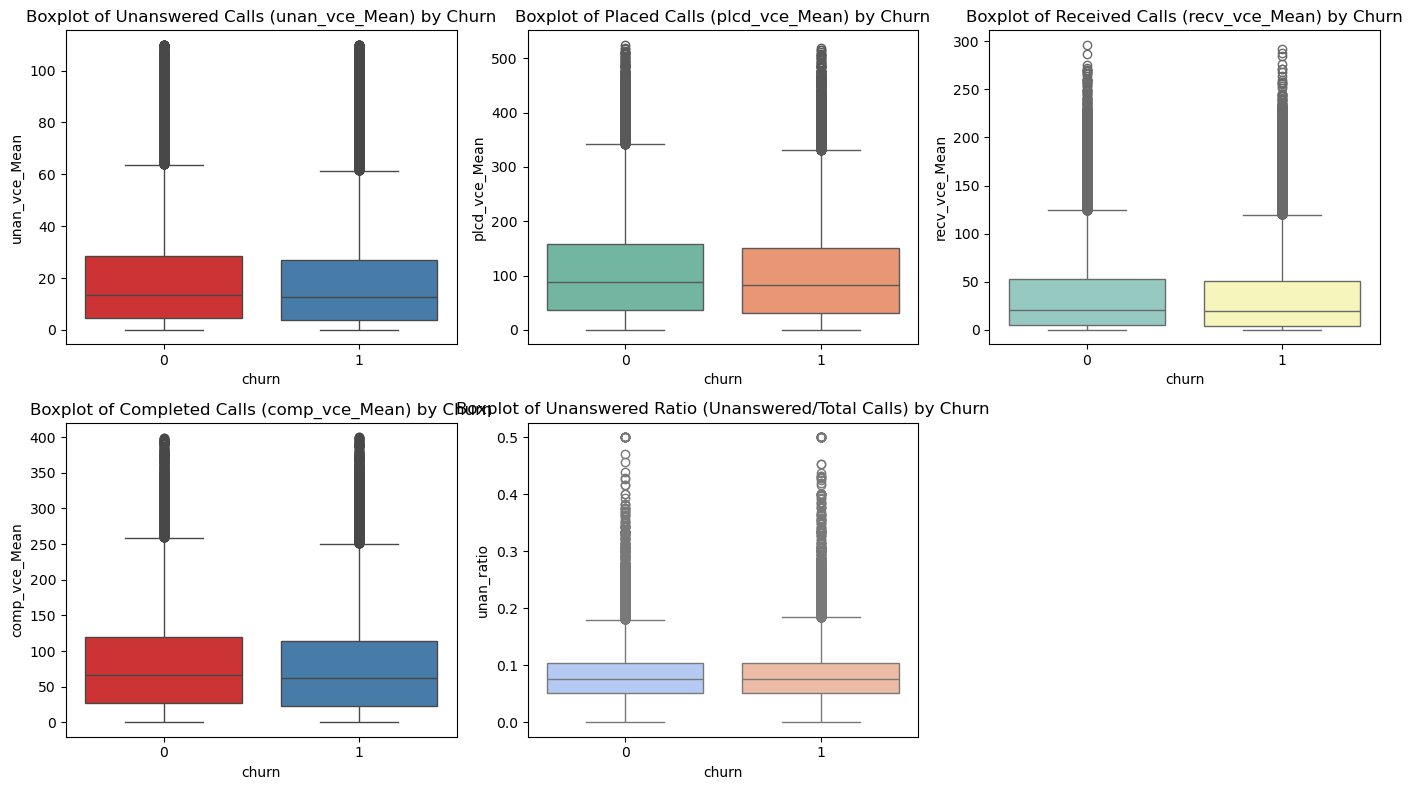

In [81]:
plt.figure(figsize=(14, 8))

# Boxplot para unan_vce_Mean
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='churn', y='unan_vce_Mean', palette='Set1')
plt.title('Boxplot of Unanswered Calls (unan_vce_Mean) by Churn')

# Boxplot para plcd_vce_Mean
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='churn', y='plcd_vce_Mean', palette='Set2')
plt.title('Boxplot of Placed Calls (plcd_vce_Mean) by Churn')

# Boxplot para recv_vce_Mean
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='churn', y='recv_vce_Mean', palette='Set3')
plt.title('Boxplot of Received Calls (recv_vce_Mean) by Churn')

# Boxplot para comp_vce_Mean
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='churn', y='comp_vce_Mean', palette='Set1')
plt.title('Boxplot of Completed Calls (comp_vce_Mean) by Churn')

# Boxplot para call_ratio
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='churn', y='unan_ratio', palette='coolwarm')
plt.title('Boxplot of Unanswered Ratio (Unanswered/Total Calls) by Churn')

plt.tight_layout()
plt.show()


None of these variables seem to impact churn. We should remove these features.

In [82]:
columns_to_drop.extend(['total_calls', 'unan_vce_Mean','plcd_vce_Mean','recv_vce_Mean','comp_vce_Mean', 'unan_ratio'])

## 1.3 Features with high correlation

In [83]:
correlation_matrix = df[numerical_features].corr()

# Get the pairs of columns with correlation greater than 0.8
threshold = 0.8
high_correlation_pairs = []

for i,col in enumerate(correlation_matrix.columns):
    for row in correlation_matrix.index[i:]:
        if col != row and abs(correlation_matrix.loc[row, col]) > threshold:
            high_correlation_pairs.append((row, col, correlation_matrix.loc[row, col]))

# Create a DataFrame to display the results
high_correlation_df = pd.DataFrame(high_correlation_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
high_correlation_df = high_correlation_df.sort_values(by='Correlation', ascending=False)

print(high_correlation_df)

          Feature 1        Feature 2  Correlation
38           adjqty         totcalls     0.999462
39           adjmou           totmou     0.999396
13     attempt_Mean    plcd_vce_Mean     0.998265
22    complete_Mean    comp_vce_Mean     0.997460
41           adjrev           totrev     0.996305
33    complete_Mean     attempt_Mean     0.986962
10    comp_vce_Mean    plcd_vce_Mean     0.986903
21     attempt_Mean    comp_vce_Mean     0.985114
7       ovrrev_Mean      ovrmou_Mean     0.984706
14    complete_Mean    plcd_vce_Mean     0.984578
4           avg3mou         mou_Mean     0.981136
0           avg3rev         rev_Mean     0.960280
16    inonemin_Mean    recv_vce_Mean     0.959204
54          avg6qty          avg3qty     0.949349
51          avg6mou          avg3mou     0.944636
49          avg6qty           avgqty     0.934274
46          avg6mou           avgmou     0.928803
6           avg6mou         mou_Mean     0.927598
19    peak_vce_Mean    comp_vce_Mean     0.902355


## Creating new categorical variables

In [84]:
df.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'ovrmou_Mean', 'ovrrev_Mean',
       'change_mou', 'change_rev', 'unan_vce_Mean', 'plcd_vce_Mean',
       'recv_vce_Mean', 'comp_vce_Mean', 'custcare_Mean', 'inonemin_Mean',
       'mou_cvce_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'mou_peav_Mean',
       'opk_vce_Mean', 'mou_opkv_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'churn', 'months', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou',
       'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty',
       'avg6rev', 'area', 'dualband', 'refurb_new', 'hnd_price', 'marital',
       'creditcd', 'eqpdays', 'custcare_bool', 'ovr_price', 'binned',
       'mou_price', 'avg_adj', 'billing_diff', 'drop_blk_percentage',
       'peak_diff', 'month_segmentation', 'call_made_received',
       'call_made_received_bool', 'total_

In [85]:
df.drop(['binned', 'avg_adj','billing_diff','call_made_received', 'peak_diff','call_made_received_bool', 'total_calls', 'unan_ratio', 'month_segmentation'], axis = 1, inplace = True)

In [86]:
columns_to_categorical = ['ovrmou_Mean','ovrrev_Mean','iwylis_vce_Mean','mouiwylisv_Mean', 'custcare_Mean', ]
columns_to_log = ['totmrc_Mean','rev_Mean','mou_Mean','ovrmou_Mean','ovrrev_Mean',
                  'unan_vce_Mean','plcd_vce_Mean','recv_vce_Mean','comp_vce_Mean',
                 'inonemin_Mean','mou_cvce_Mean','mou_rvce_Mean','owylis_vce_Mean',
                 'mouowylisv_Mean','mouiwylisv_Mean','peak_vce_Mean', 'mou_peav_Mean','opk_vce_Mean',
                 'mou_opkv_Mean','drop_blk_Mean','attempt_Mean','complete_Mean','totcalls','totmou',
                 'totrev','adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou',
                'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty',
                'avg6rev','mou_price']
columns_to_scale = ['months', 'hnd_price', 'eqpdays']

columns_to_one_hot_enconde  = ['crclscod', 'asl_flag', 'area', 'dualband','refurb_new','marital', 'creditcd', 'month_segmentation']
#'mou_Mean', 'ovrmou_Mean', 'drop_blk_Mean', 'refurb_new', 'mou_price', ---> Questões sobre

#'ovr_price', 'drop_blk_percentage', 'mou_price --> O QUE FAZER? (Vários NaN, Infs e etc)

In [87]:
[column for column in df.columns if column not in list(set(columns_to_categorical + columns_to_log + columns_to_scale + columns_to_one_hot_enconde))]

['change_mou',
 'change_rev',
 'churn',
 'custcare_bool',
 'ovr_price',
 'drop_blk_percentage']

In [88]:
#columns = 'mou_rvce_Mean'

if False:
    for columns in df.columns[:3]:
    
        columns = 'mou_Mean'
    
        print(columns)
        print(df[columns].value_counts())
        print(len(df[df[columns]==0])/len(df)*100)
        fig, ax = plt.subplots(2,1)
        
        sns.histplot(data = df, x = columns, bins = 30, ax = ax[0])
        
        if df[columns].min()<-1:
            continue
    
        
        lnbins = np.linspace( np.log10(df[columns].min()+1), np.log10(df[columns].max()+1), 30) 
        sns.histplot(data = df, x = columns, bins = 10**lnbins, ax = ax[1])
        ax[1].set_xscale('log')
        
        plt.tight_layout()
        plt.show()



In [89]:
save = False
if save:

    for col in columns_to_drop:
        if col not in df.columns:
            continue
        df.drop(col, axis = 1, inplace = True)
    
    df.to_csv('../data/data_for_modelling.csv', index = False)



In [90]:
columns_to_drop

['billing_diff',
 'avg_adj',
 'adjrev',
 'adjmou',
 'adjqty',
 'peak_vce_Mean',
 'mou_peav_Mean',
 'opk_vce_Mean',
 'mou_opkv_Mean',
 'peak_diff',
 'totrev',
 'totmou',
 'totcalls',
 'call_made_received',
 'call_made_received_bool',
 'mou_rvce_Mean',
 'mou_cvce_Mean',
 'inonemin_Mean',
 'mouiwylisv_Mean',
 'mouowylisv_Mean',
 'owylis_vce_Mean',
 'iwylis_vce_Mean',
 'total_calls',
 'unan_vce_Mean',
 'plcd_vce_Mean',
 'recv_vce_Mean',
 'comp_vce_Mean',
 'unan_ratio']

In [91]:
columns_to_drop.extend(['avgmou','avg6mou','avg3mou', 'avgrev','avg6rev','avg3rev','avgqty','avg6qty','avg3qty','ovrmou_Mean','complete_Mean'])

df_all = df.copy()

for col in columns_to_drop:
    if col not in df.columns:
        continue
    df.drop(col, axis = 1, inplace = True)

numerical_features = list(set(numerical_features) - set(columns_to_drop))

In [92]:
correlation_matrix = df[numerical_features].corr()

# Get the pairs of columns with correlation greater than 0.8
threshold = 0.7
high_correlation_pairs = []

for i,col in enumerate(correlation_matrix.columns):
    for row in correlation_matrix.index[i:]:
        if col != row and abs(correlation_matrix.loc[row, col]) > threshold:
            high_correlation_pairs.append((row, col, correlation_matrix.loc[row, col]))

# Create a DataFrame to display the results
high_correlation_df = pd.DataFrame(high_correlation_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
high_correlation_df = high_correlation_df.sort_values(by='Correlation', ascending=False)

print(high_correlation_df)

      Feature 1 Feature 2  Correlation
0  attempt_Mean  mou_Mean     0.750974
